In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_3106/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import os
import copy
import hist
from coffea import util
import numpy as np
import itertools
import pandas as pd
import uproot3
import mplhep as hep

/opt/conda/lib/python3.8/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):


In [3]:
dir1 = 'CoffeaOutputsForCombine/Coffea_FirstRun/'
dir2 = 'CoffeaOutputsForCombine/Coffea_SecondRun/'

btagDir = 'MediumBTag/'#'LooseBTag/'
btagType = 'CSVV2/'
yearDir = '2016/'

APVDir = {
    'preVFP': 'APV/',
    'postVFP': 'noAPV/'
}

od = ''
oddir = ''
if btagDir == '':
    od = '_oldANdisc'
    oddir = 'Old2016_MediumBTag/'
    
MR = ''#'_MistagOnly'

# Systematic Correction / Uncertainty Label
## Set the strings accordingly
#### For bTagSyst: '_btagUnc_\<syst\>' where \<syst\> can be either $central$, $up$ or $down$

In [4]:
Unc = '_btagUnc_central_method2' #_btagUnc_central_method2
UncDir = Unc + '/'

# Load All Data Eras

In [5]:
from LoadData import JetHT_Unweighted, JetHT_Weighted, Cutflow

JetHT2016_unweighted = JetHT_Unweighted('MediumBTag', 2016)
JetHT2016_weighted = JetHT_Weighted('MediumBTag', 2016, True, Unc, False)

In [6]:
Cutflow(JetHT2016_weighted)

------- Data Sum of Cutflows --------
          all events :  625441538
                sumw :  625441538
               sumw2 :  625441538
  Passed MET Filters :  594489591
   Passed Trigger(s) :   67343846
       Passed HT Cut :   59431047
 Passed Loose Jet ID :   59431047
     Passed pT,y Cut :   59431047
         >= oneTTbar :   32258385
     Passed dPhi Cut :   32163720
        Good Subjets :   31387979
          AT&Pt0bcen :      46407
          AT&Pt0bfwd :      45148
          AT&Pt1bcen :      40900
          AT&Pt1bfwd :      42794
          AT&Pt2bcen :      11195
          AT&Pt2bfwd :      11368
             at0bcen :    1220500
             at0bfwd :    1254202
             at1bcen :     901495
             at1bfwd :     993048
             at2bcen :     178583
             at2bfwd :     203649
           pret0bcen :     322227
           pret0bfwd :     322042
           pret1bcen :     257496
           pret1bfwd :     278259
           pret2bcen :      58447
          

# Load All MC

In [7]:
TTbar_unweighted1, TTbar_unweighted2 = {}, {}
TTbar_weighted1, TTbar_weighted2 = {}, {}
QCD_unweighted = {}
QCD_weighted = {}

In [8]:
contam = '_ttbarContamRemoved'
for vfp in ['preVFP', 'postVFP']:
    TTbar_unwgt_str1 = f'TTbarRes_0l_UL16{vfp}_TTbar_700_1000'
    TTbar_unwgt_str2 = f'TTbarRes_0l_UL16{vfp}_TTbar_1000_Inf'
    TTbar_unweighted1[vfp] = util.load(f'{dir1}TT/{btagDir}{yearDir}{APVDir[vfp]}{TTbar_unwgt_str1}{od}.coffea')
    TTbar_unweighted2[vfp] = util.load(f'{dir1}TT/{btagDir}{yearDir}{APVDir[vfp]}{TTbar_unwgt_str2}{od}.coffea')
    
    QCD_unwgt_str = f'TTbarRes_0l_UL16{vfp}_QCD'
    QCD_unweighted[vfp] = util.load(f'{dir1}QCD/{btagDir}{yearDir}{APVDir[vfp]}{QCD_unwgt_str}{od}.coffea')
    
    TTbar_wgt_str1 = f'{TTbar_unwgt_str1}_weighted{contam}{Unc}{MR}'
    TTbar_wgt_str2 = f'{TTbar_unwgt_str2}_weighted{contam}{Unc}{MR}'
    TTbar_weighted1[vfp] = util.load(f'{dir2}TT/{btagDir}{yearDir}{APVDir[vfp]}{TTbar_wgt_str1}{od}.coffea')
    TTbar_weighted2[vfp] = util.load(f'{dir2}TT/{btagDir}{yearDir}{APVDir[vfp]}{TTbar_wgt_str2}{od}.coffea')
    
    QCD_wgt_str = f'{QCD_unwgt_str}_weighted{contam}{Unc}{MR}'
    QCD_weighted[vfp] = util.load(f'{dir2}QCD/{btagDir}{yearDir}{APVDir[vfp]}{QCD_wgt_str}{od}.coffea')

# Unweighted MC Cutflow

In [9]:
for name,output in TTbar_unweighted1.items(): 
    print("-------Unweighted TTbar 700 to 1000 " + name + "--------")
    for i,j in output['cutflow'].items():        
        print( '%20s : %12d' % (i,j) )

-------Unweighted TTbar 700 to 1000 preVFP--------
          all events :     23506193
                sumw :  16150398044
               sumw2 : 11096452188288
  Passed MET Filters :     23506193
       Passed HT Cut :      1233774
 Passed Loose Jet ID :      1233774
     Passed pT,y Cut :      1233774
         >= oneTTbar :       258200
     Passed dPhi Cut :       251851
        Good Subjets :       247784
          AT&Pt0bcen :         1036
          AT&Pt0bfwd :          432
          AT&Pt1bcen :         5373
          AT&Pt1bfwd :         1819
          AT&Pt2bcen :         5824
          AT&Pt2bfwd :         1079
             at0bcen :         5464
             at0bfwd :         3154
             at1bcen :        21193
             at1bfwd :        10269
             at2bcen :        15739
             at2bfwd :         4305
           pret0bcen :         5153
           pret0bfwd :         2674
           pret1bcen :        24158
           pret1bfwd :        10739
           

In [10]:
for name,output in TTbar_unweighted2.items(): 
    print("-------Unweighted TTbar 1000 to Inf " + name + "--------")
    for i,j in output['cutflow'].items():        
        print( '%20s : %12d' % (i,j) )

-------Unweighted TTbar 1000 to Inf preVFP--------
          all events :     22606304
                sumw :  15532111463
               sumw2 : 10671646109424
  Passed MET Filters :     22606304
       Passed HT Cut :      4166764
 Passed Loose Jet ID :      4166764
     Passed pT,y Cut :      4166764
         >= oneTTbar :      2250570
     Passed dPhi Cut :      2227570
        Good Subjets :      2192135
          AT&Pt0bcen :         5784
          AT&Pt0bfwd :         4448
          AT&Pt1bcen :        41143
          AT&Pt1bfwd :        31263
          AT&Pt2bcen :        73670
          AT&Pt2bfwd :        53447
             at0bcen :        23960
             at0bfwd :        19157
             at1bcen :       129087
             at1bfwd :        98691
             at2bcen :       168501
             at2bfwd :       125072
           pret0bcen :        30302
           pret0bfwd :        21865
           pret1bcen :       186999
           pret1bfwd :       131558
           

# Stuff for Plotting

In [11]:
import matplotlib.pyplot as plt
import warnings
import re # regular expressions
import HelpfulPlottingDefs as hpd
warnings.filterwarnings("ignore")

# ---- Reiterate categories ---- #
ttagcats = ["AT&Pt", "at", "pret", "0t", "1t", ">=1t", "2t", ">=0t"] 
btagcats = ["0b", "1b", "2b"]
ycats = ['cen', 'fwd']

list_of_cats = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]
list_of_bcats = [ b+y for b,y in itertools.product( btagcats, ycats) ]
label_cats_dict = {i: label for i, label in enumerate(list_of_cats)}

In [12]:
maindirectory = os.getcwd() 
print(maindirectory)

/home/cms-jovyan/TTbarAllHadUproot


# Luminosities, Cross Sections & Scale Factors

In [13]:
Nevts2016 = 625441538 # from dasgoclient

Lum2016 = 35920. # pb^-1 from https://twiki.cern.ch/twiki/bin/viewauth/CMS/PdmVAnalysisSummaryTable
# Lum2017 = 41530.
# Lum2018 = 59740.
# Lum     = 137190.

t_BR = 0.6741
ttbar_BR = 0.4544 #PDG 2019
ttbar_xs1 = 831.76 * (0.09210) #pb For ttbar mass from 700 to 1000
ttbar_xs2 = 831.76 * (0.02474) #pb For ttbar mass from 1000 to Inf
toptag_sf = 0.9
toptag_kf = 0.7
qcd_xs = 1370000000.0 #pb From https://cms-gen-dev.cern.ch/xsdb
Lum = {
    'preVFP': 19800.,
    'postVFP': 16128.
}


# =========== SF =========== #
ttbar2016_sf1, ttbar2016_sf2= {}, {}
qcd2016_sf = {}

for vfp in ['preVFP', 'postVFP']:
    ttbar2016_sf1[vfp] = Lum[vfp]*ttbar_xs1*toptag_sf**2*toptag_kf/TTbar_unweighted1[vfp]['cutflow']['sumw']
    ttbar2016_sf2[vfp] = Lum[vfp]*ttbar_xs2*toptag_sf**2*toptag_kf/TTbar_unweighted2[vfp]['cutflow']['sumw']
    qcd2016_sf[vfp] = Lum[vfp]*qcd_xs/QCD_unweighted[vfp]['cutflow']['sumw']

# Bkg. Est. Shape Closure Test


/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/ClosureTest/NormalizedToUnity/2016/MediumBTag/CSVV2/probept/BkgEst_probept_btagUnc_central_method2_0bcen_Closure.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/ClosureTest/NormalizedToUnity/2016/MediumBTag/CSVV2/probept/BkgEst_probept_btagUnc_central_method2_0bfwd_Closure.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/ClosureTest/NormalizedToUnity/2016/MediumBTag/CSVV2/probept/BkgEst_probept_btagUnc_central_method2_1bcen_Closure.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/ClosureTest/NormalizedToUnity/2016/MediumBTag/CSVV2/probept/BkgEst_probept_btagUnc_central_method2_1bfwd_Closure.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/ClosureTest/NormalizedToUnity/2016/MediumBTag/CSVV2/probept/BkgEst_probept_btagUnc_central_method2_2bcen_Closure.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/ClosureTest/NormalizedToUnity/2016/MediumBTag/CSVV2/probept/BkgEst_probept_btagUnc_central_method2_2bfwd_Closure.png

/home/cms

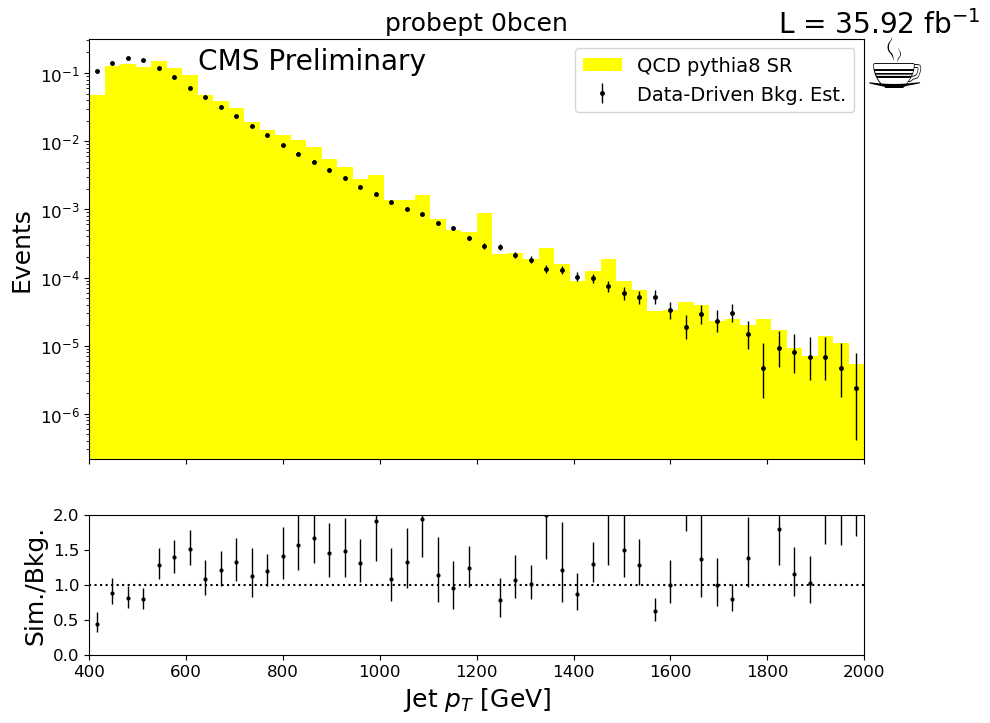

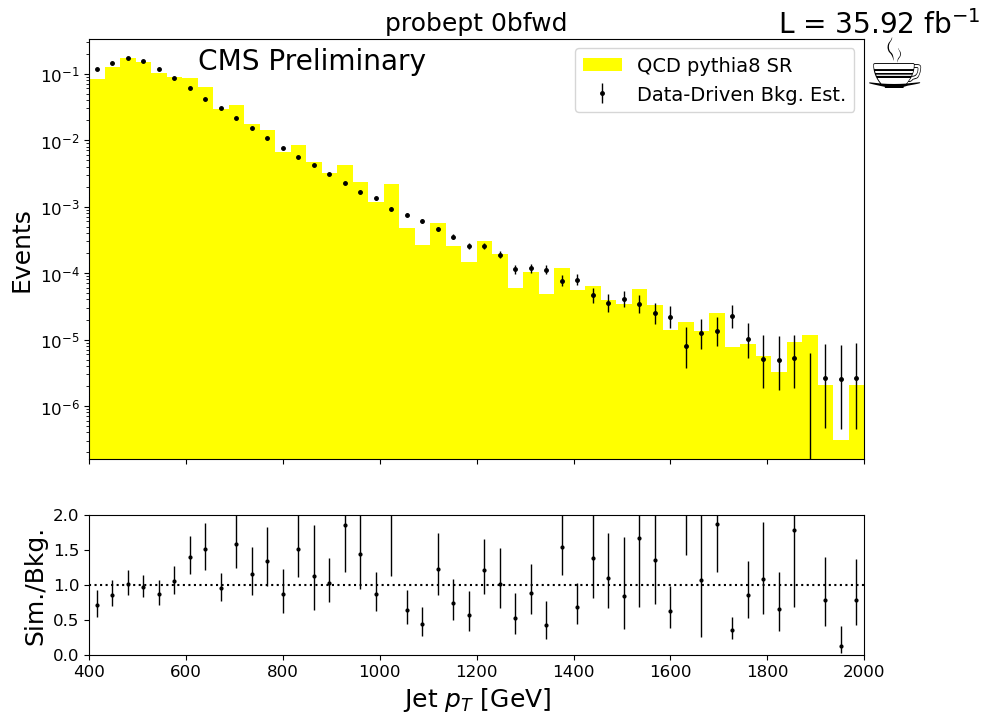

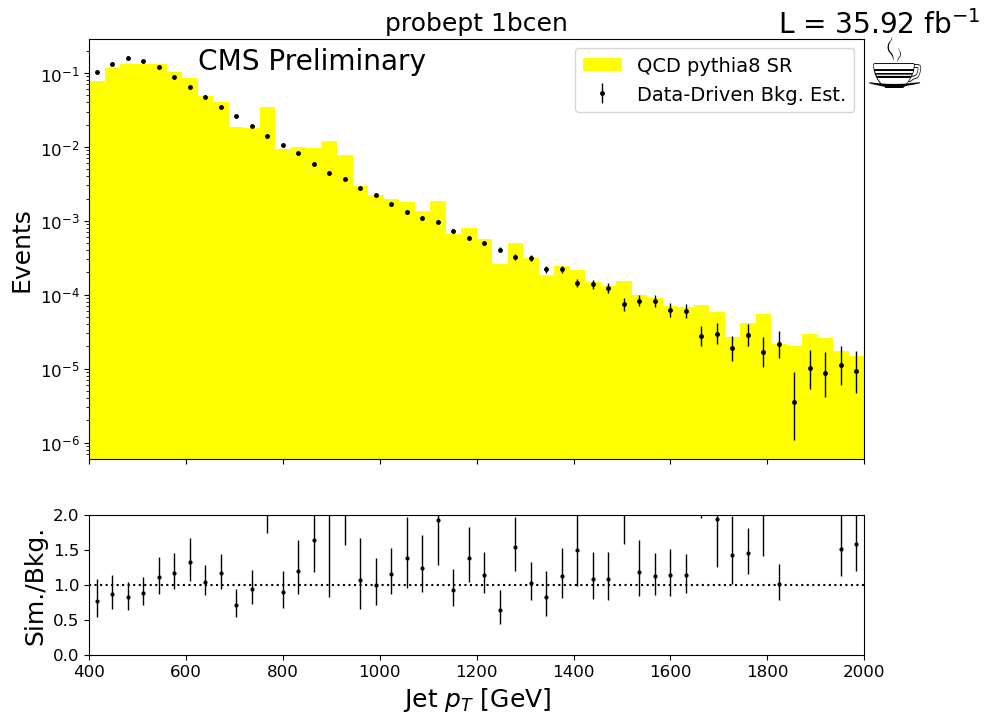

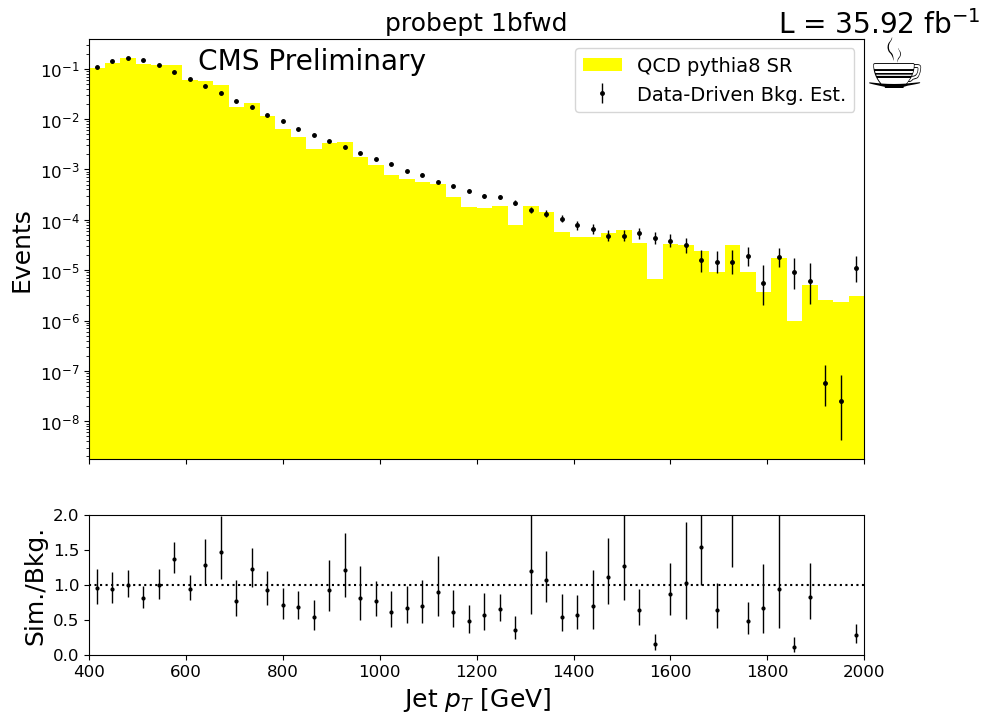

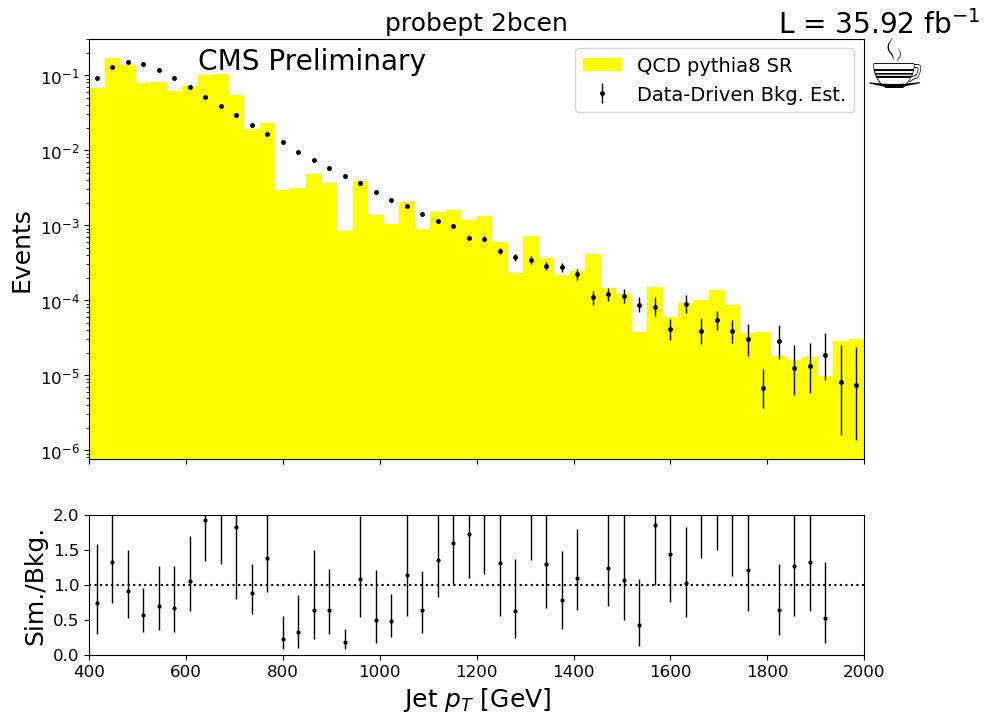

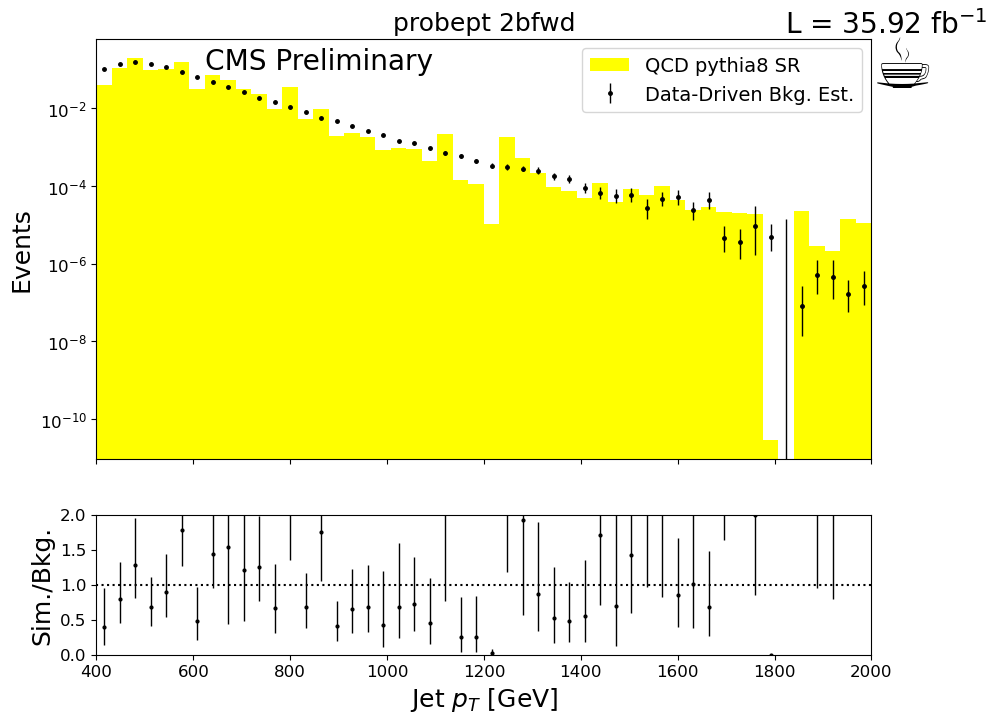

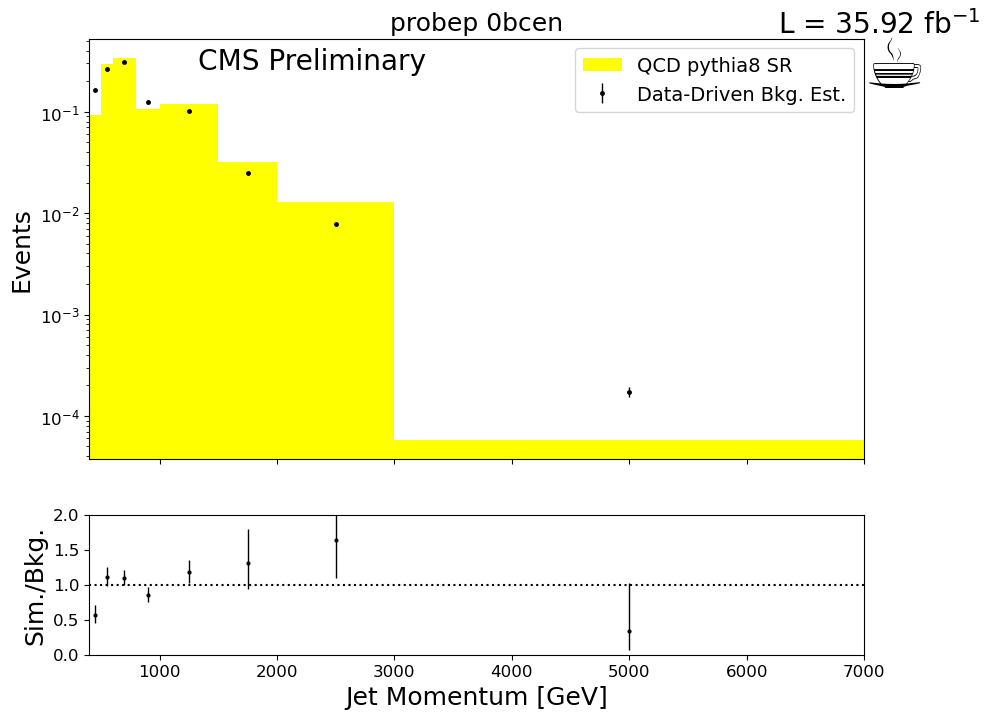

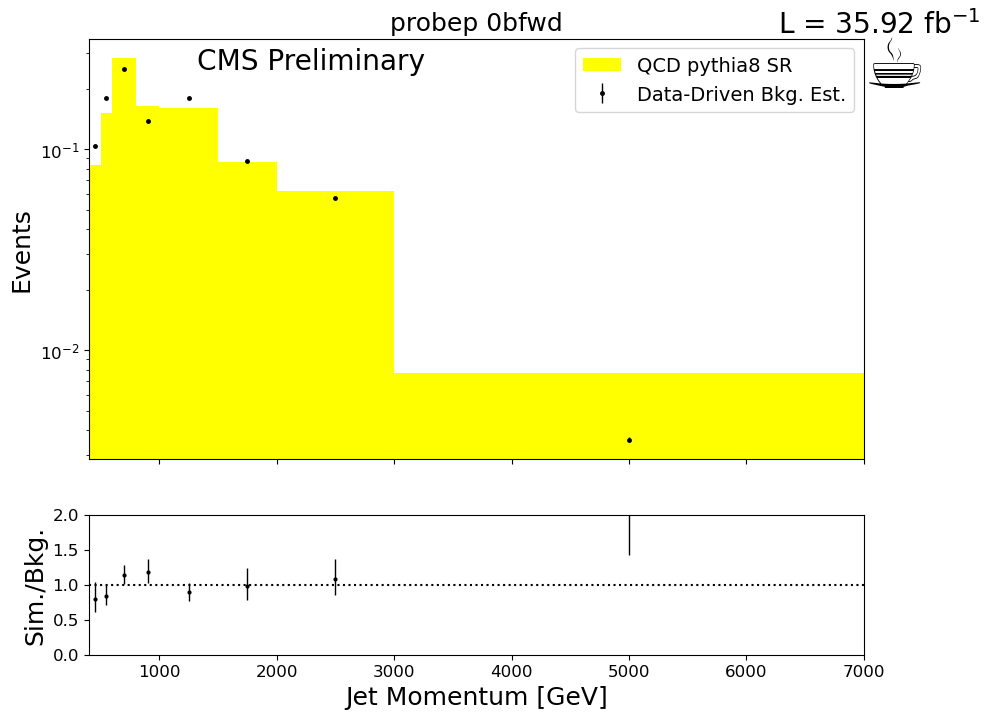

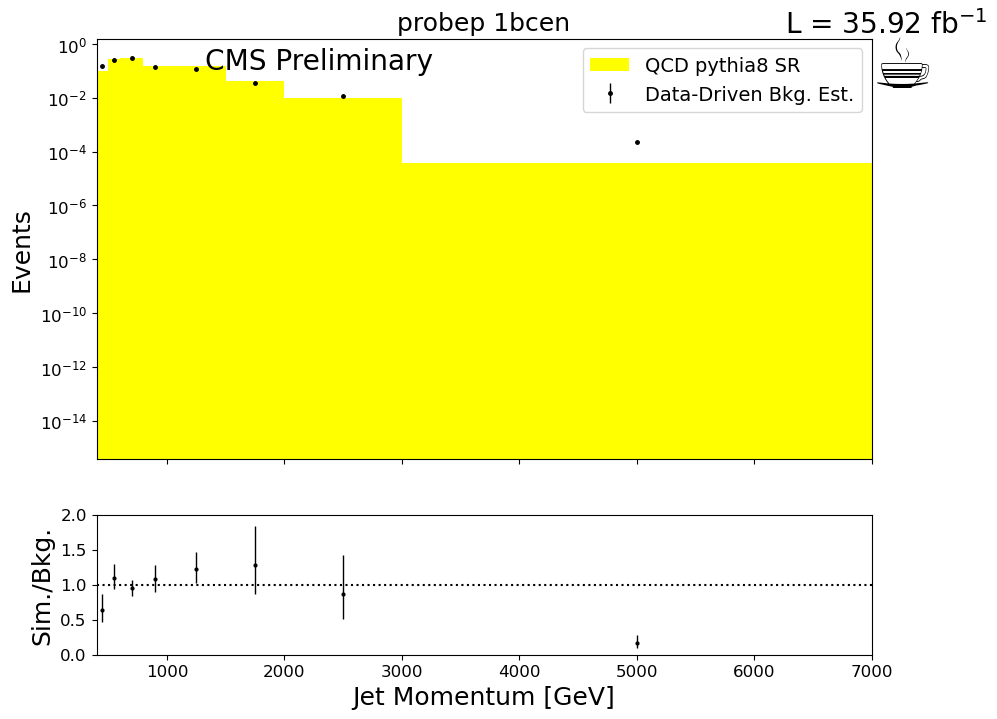

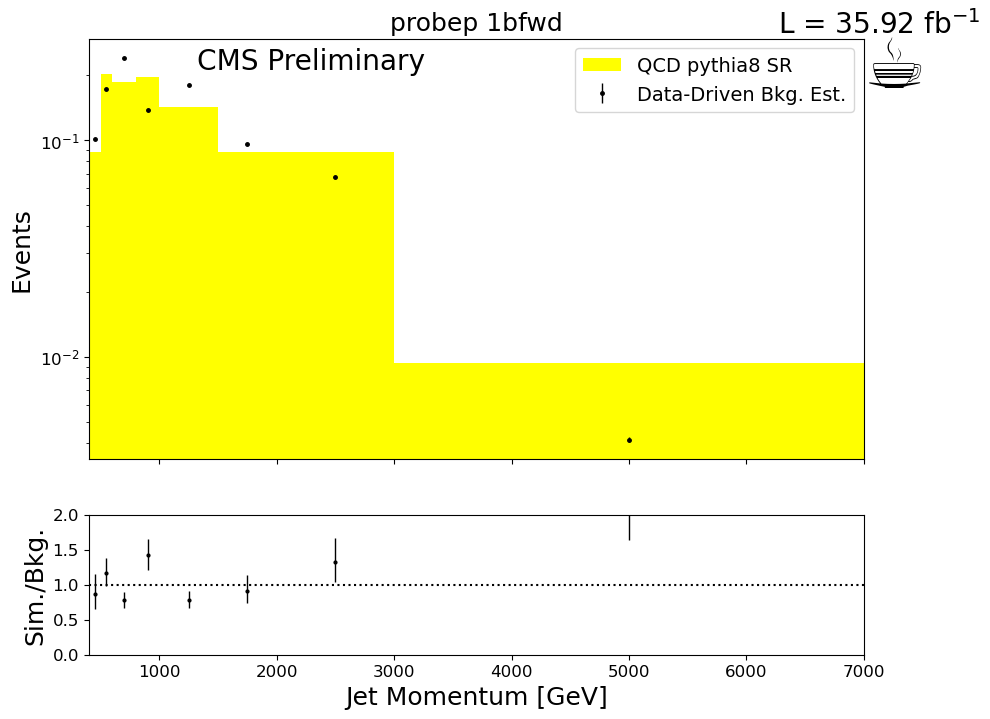

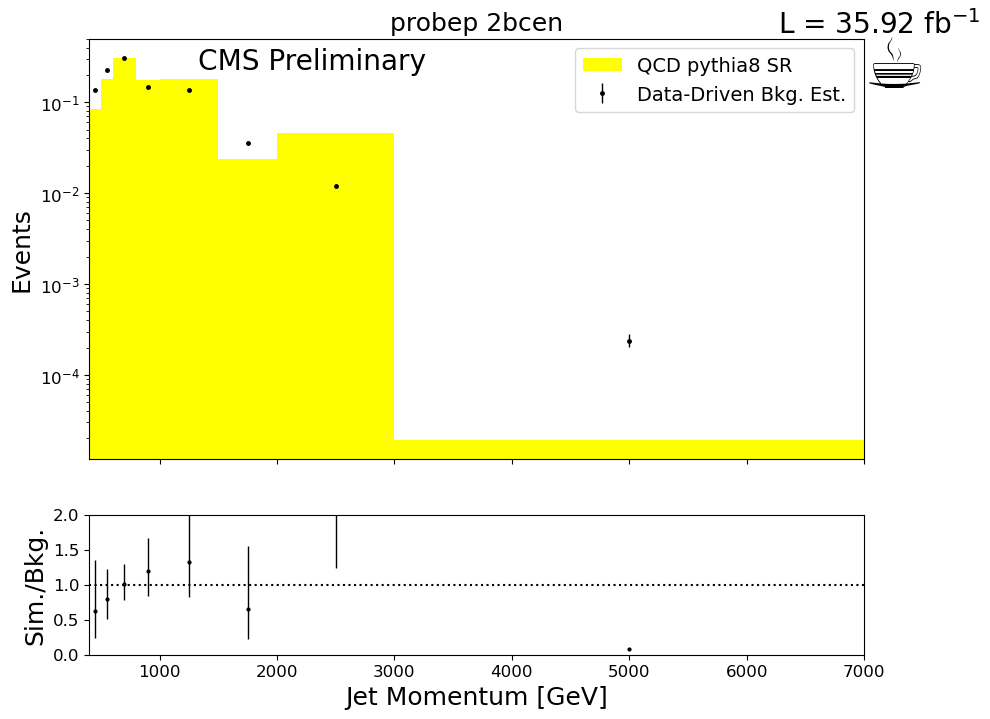

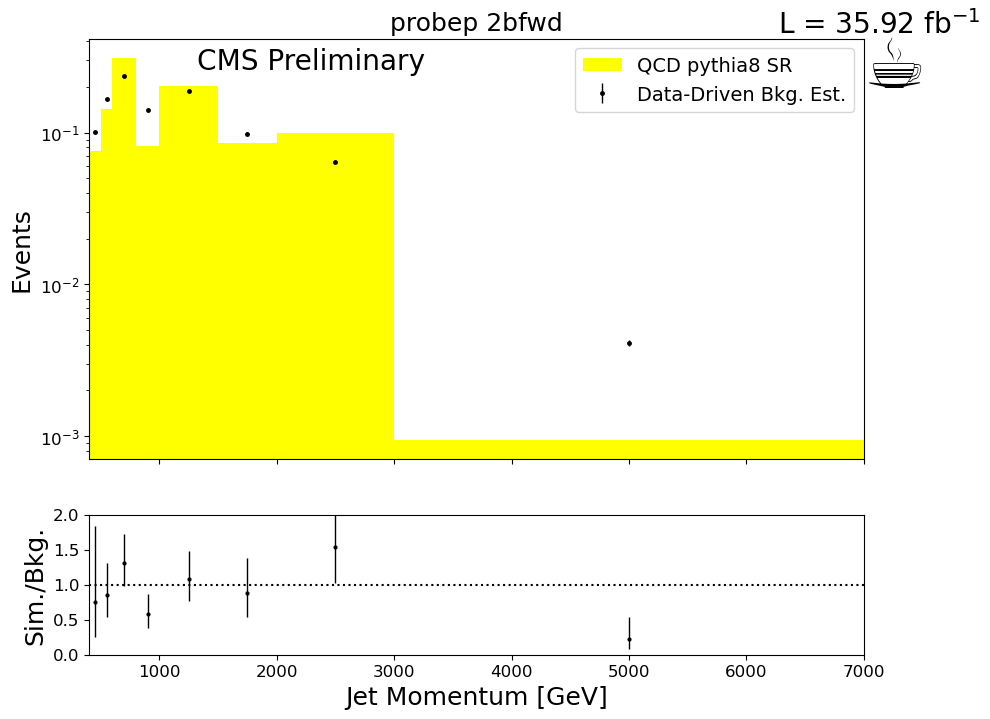

In [14]:
list_of_hists = ['probept', 'probep']
# list_of_hists = ['probep']
apvdir = '' #APVDir['preVFP']
for name in list_of_hists:
    SaveDirectory = f'{maindirectory}/BkgEstimate/ClosureTest/NormalizedToUnity/{yearDir}{btagDir}{oddir}{btagType}{apvdir}{name}/' # split histograms into subdirectories
    hpd.DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already
    for b_y in list_of_bcats:
        plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
        })

        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(10,8),
            gridspec_kw={"height_ratios": (3, 1)},
            sharex=True,
        )
        # ---- initialize data histograms with first era ---- #
        JetHT2016_unwgt_str = 'UL16preVFP_JetHTB_Data'
        Data_hist_modmass_wgt = JetHT2016_weighted['B_preVFP'][name][JetHT2016_unwgt_str, hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]
        
        # ---- Add all data together ---- #
        for vfp in ['preVFP', 'postVFP']:
            #---- Define Histograms from Coffea Outputs ----# 
            if vfp == 'preVFP':
                for Era in ['C', 'D', 'E', 'F']: #exclude B because histogram is initialized with B era
                    JetHT2016_unwgt_str = f'UL16{vfp}_JetHT{Era}_Data'
                    # -- For Mass Modified Background Estimate (Non-Top Multi-Jets; NTMJ)-- #
                    Data_hist_modmass_wgt += JetHT2016_weighted[Era+'_'+vfp][name][JetHT2016_unwgt_str, hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]
            else:
                for Era in ['F', 'G', 'H']: #exclude B because histogram is initialized with B era
                    JetHT2016_unwgt_str = f'UL16{vfp}_JetHT{Era}_Data'
                    # -- For Mass Modified Background Estimate (Non-Top Multi-Jets; NTMJ)-- #
                    Data_hist_modmass_wgt += JetHT2016_weighted[Era+'_'+vfp][name][JetHT2016_unwgt_str, hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]

        

        # -- SM TTbar MC in Signal Region (Contributes to the Background) -- #
        SMTTbar1 = TTbar_unweighted1['preVFP'][name]['UL16preVFP_TTbar_700_1000', hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]\
                *ttbar2016_sf1['preVFP']\
                + TTbar_unweighted1['postVFP'][name]['UL16postVFP_TTbar_700_1000', hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]\
                *ttbar2016_sf1['postVFP']
        SMTTbar2 = TTbar_unweighted2['preVFP'][name]['UL16preVFP_TTbar_1000_Inf', hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]\
                *ttbar2016_sf2['preVFP']\
                + TTbar_unweighted2['postVFP'][name]['UL16postVFP_TTbar_1000_Inf', hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]\
                *ttbar2016_sf2['postVFP']
        SMTTbar = SMTTbar1 + SMTTbar2

        # -- Mistag Weighted TTbar MC (To Remove Double Counting of Untracked t-tagged J1 Events in Bkg.Est) -- #
        ExtraTTbar1 = TTbar_weighted1['preVFP'][name]['UL16preVFP_TTbar_700_1000', hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]\
                   *ttbar2016_sf1['preVFP']\
                   + TTbar_weighted1['postVFP'][name]['UL16postVFP_TTbar_700_1000', hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]\
                   *ttbar2016_sf1['postVFP']
        ExtraTTbar2 = TTbar_weighted2['preVFP'][name]['UL16preVFP_TTbar_1000_Inf', hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]\
                   *ttbar2016_sf2['preVFP']\
                   + TTbar_weighted2['postVFP'][name]['UL16postVFP_TTbar_1000_Inf', hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]\
                   *ttbar2016_sf2['postVFP']
        ExtraTTbar = ExtraTTbar1 + ExtraTTbar2
        

        # =============================================================================================================================== #
        
        # ---- TTbar MC Scaling ---- #
        # SMTTbar *= (ttbar2016_sf) # Prepare to include this with background estimate
        # ExtraTTbar *= (-ttbar2016_sf) # Prepare to subtract this from background to correct for ttbar contamination
        
        # ---- Add SM ttbar MC to background and remove excess events ---- #
        Data_hist_modmass_wgt += (SMTTbar) # Include signal region SM ttbar contribution to NTMJ for the complete background estimate
        #(mistagged ttbar events need to be removed)#
        Data_hist_modmass_wgt += (ExtraTTbar) # ttbar contamination subtraction from background estimate 
        #(removes doubly counted ttbar events included in previous line)#
        

        # =============================================================================================================================== #

        # ---- Background and Observed Signal for Histograms Compared with MC Signals ---- #

        # -- J0 t-tagged and weighted, J1 Mass Modified, SM ttbar included, J1 t-tagged double counts removed -- #
        Background_ModMass_Corrected = Data_hist_modmass_wgt 

        # -- QCD MC -- #
        QCD_hist = QCD_weighted['preVFP'][name]['UL16preVFP_QCD', hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]\
                 *qcd2016_sf['preVFP']\
                 + QCD_weighted['postVFP'][name]['UL16postVFP_QCD', hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]\
                 *qcd2016_sf['postVFP']

        # QCD_hist *= qcd2016_sf #scaled according to luminosity 
        QCD_hist += SMTTbar
        
        # ---- Extract both the estimate and QCD events from histograms ---- #
        NtotalQCD = np.sum(QCD_hist.view().value)
        NtotalData = np.sum(Background_ModMass_Corrected.view().value)
        
        # # ---- Normalize QCD histogram directly to the estimate (compare shape) ---- #
        # if NtotalQCD > 0.:
        #     QCD_hist *= (NtotalData/NtotalQCD)
        # else:
        #     QCD_hist *= 0.
        
        # ---- Normalize to Unity (compare shape) ---- #
        if NtotalQCD > 0.:
            QCD_hist *= (1.0/NtotalQCD)
        else:
            QCD_hist *= 0.
        if NtotalData > 0.:
            Background_ModMass_Corrected *= (1.0/NtotalData)
        else:
            Background_ModMass_Corrected *= 0.


        # ---- Plot Histograms (Comment out whatever you don't want included in the figure and/or root file) ---- #
        QCDPlot = QCD_hist.plot1d(ax=ax, histtype='fill', color='yellow')
        BackgroundPlot = Background_ModMass_Corrected.plot1d(ax=ax, histtype='errorbar', marker='.', markersize=5., color='k')
#         TTbarPlot = TTbar_2016_wgt_forplot.plot1d(ax=ax, histtype='fill', color='r')
        
        # plt.ylim(bottom = .1, top = 10**4)

        ax.set_yscale('log')
        # ax.set_ylim(bottom=1.0)
#         ax.autoscale('y')
#         ax.autoscale('x')#, tight=True) # doesn't look like its working...
        ax.set_ylabel('Events')
        ax.set_xlabel(None)
        ax.set_title(name + ' ' + b_y)

        #---- Plot Ratio ----#
        hpd.plotratio(QCD_hist, Background_ModMass_Corrected, ax = rax, histtype='errorbar', marker='.', markersize=4., color='k')
        
        l1 = [r'QCD pythia8 SR', r'Data-Driven Bkg. Est.']
        legtitle1 = ax.legend(labels=l1, fontsize='medium')
        
        
        rax.set_ylabel('Sim./Bkg.')
        rax.axhline(y=1, color='k', linestyle=':')
        rax.set_ylim(0,2)
        
        CMSx, CMSy = 0.01, 0.98 # Position of CMS Preliminary label
        if 'ttbarmass' in name:
            rax.set_xlim(950,6000)
            CMSx = 0.14 
            CMSy = 0.98
        elif 'jetpt' in name:
            rax.set_xlim(400,2000)
            CMSx = 0.26 
            CMSy = 0.98
        elif 'jeteta' in name:
            rax.set_xlim(-2.3,2.3)
        elif 'jetphi' in name:
            rax.set_xlim(-3.14, 3.14)
        elif 'jety' in name:
            rax.set_xlim(-3., 3.)
        elif 'jetdy' in name:
            rax.set_xlim(0., 5.)
        elif 'probept' in name:
            rax.set_xlim(400., 2000.)
            CMSx = 0.14 
            CMSy = 0.98
        elif 'probep' in name:
            rax.set_xlim(400., 7000.)  
            CMSx = 0.14 
            CMSy = 0.98
        

        #---- Labeling ----#
        Lint = str(Lum2016*.001) # Integrated Luminosity
        lumi = plt.text(1.15, 1.07, "L = " + Lint[:6] + " fb$^{-1}$",
                fontsize='x-large',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )
        CMS = plt.text(CMSx, CMSy, 'CMS Preliminary',
                fontsize='x-large',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes
               )
        coffea = plt.text(1.00, 0.85, u"☕",
                  fontsize=50,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )

        filename = 'BkgEst_' + name + '' + Unc + '_' + b_y + '_Closure.png'
        # plt.savefig(SaveDirectory+filename, bbox_inches="tight")
        print('\n' + SaveDirectory + filename)


## Analysis Plots with Data Driven Background Estimate


/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/2016/MediumBTag/CSVV2/ttbarmass/log/BkgEst_ttbarmass_btagUnc_central_method2_0bcen.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/2016/MediumBTag/CSVV2/ttbarmass/log/BkgEst_ttbarmass_btagUnc_central_method2_0bfwd.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/2016/MediumBTag/CSVV2/ttbarmass/log/BkgEst_ttbarmass_btagUnc_central_method2_1bcen.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/2016/MediumBTag/CSVV2/ttbarmass/log/BkgEst_ttbarmass_btagUnc_central_method2_1bfwd.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/2016/MediumBTag/CSVV2/ttbarmass/log/BkgEst_ttbarmass_btagUnc_central_method2_2bcen.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/2016/MediumBTag/CSVV2/ttbarmass/log/BkgEst_ttbarmass_btagUnc_central_method2_2bfwd.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/2016/MediumBTag/CSVV2/jetpt/log/BkgEst_jetpt_btagUnc_central_method2_0bcen.png

/home/cms-jovyan/TTbarAllHadUproot/BkgEstimate/2016/MediumBTag

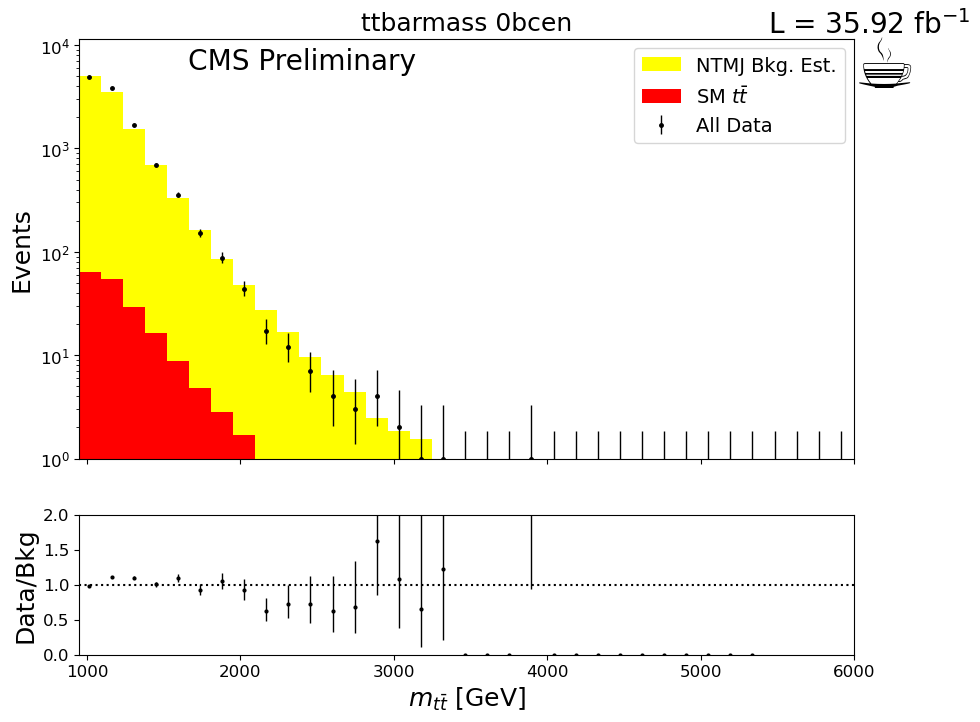

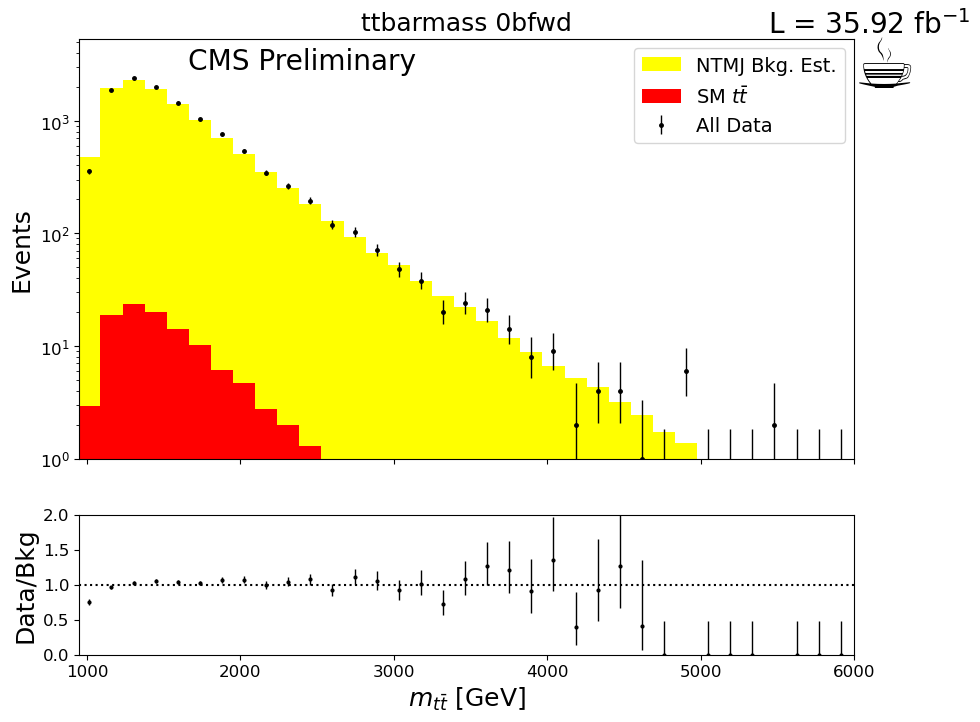

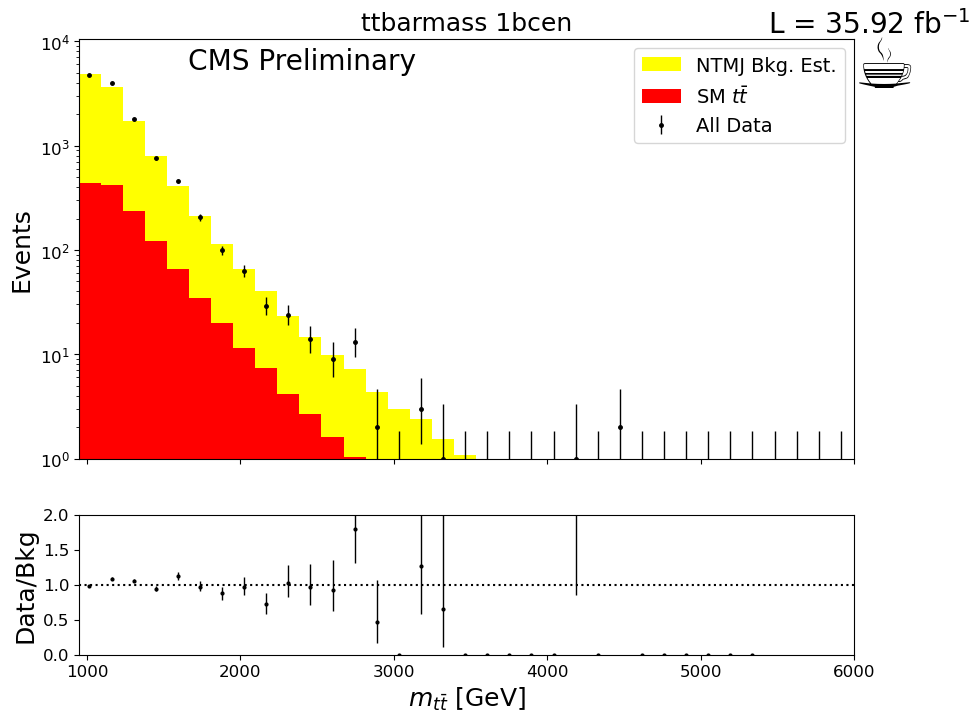

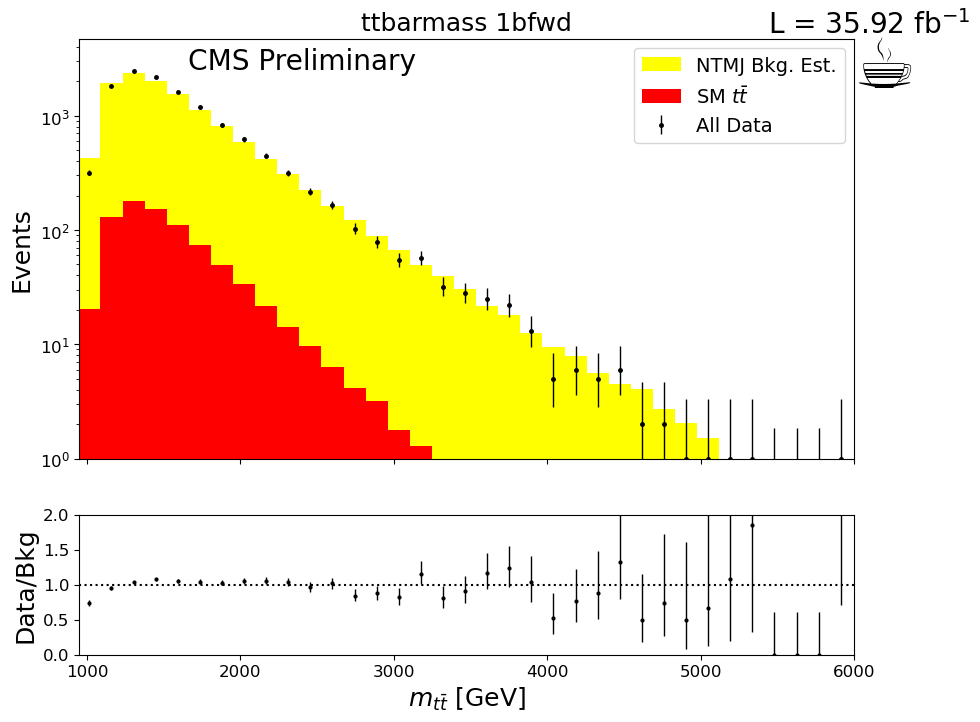

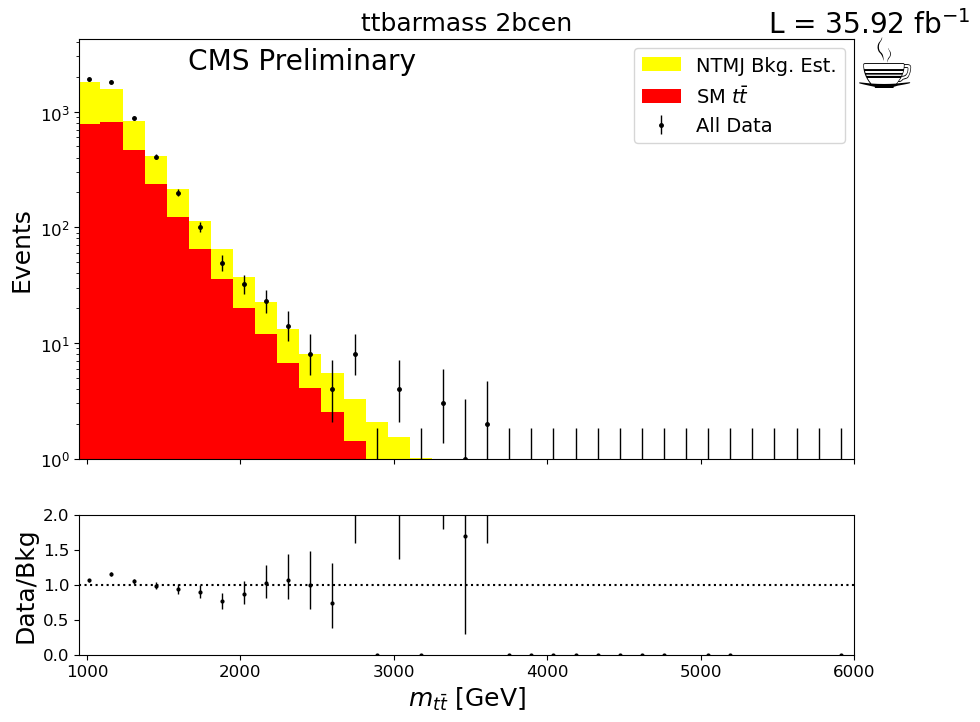

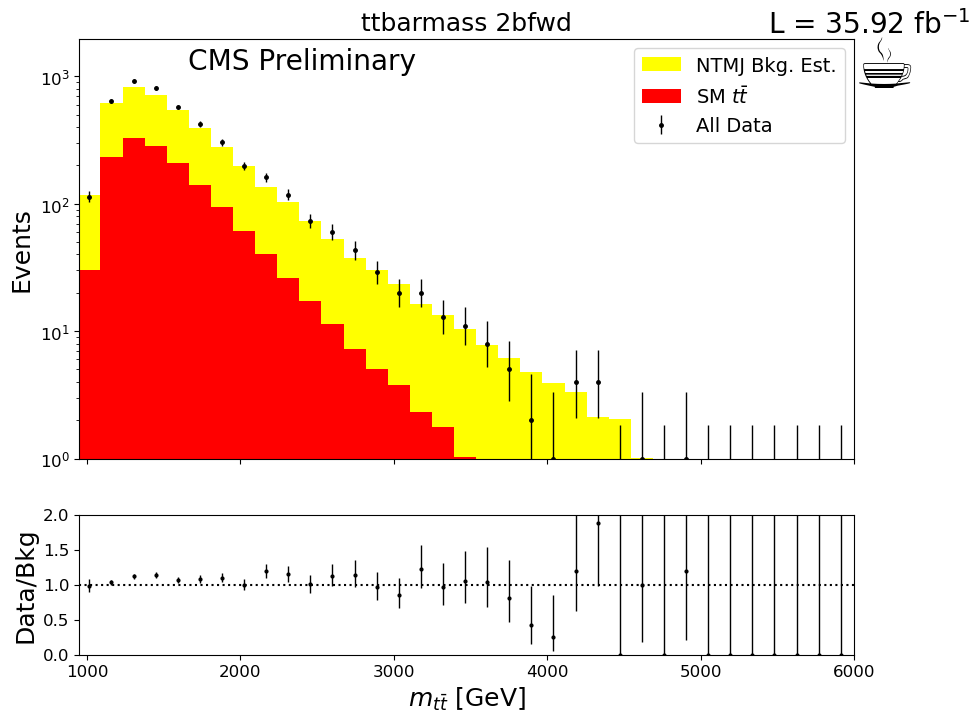

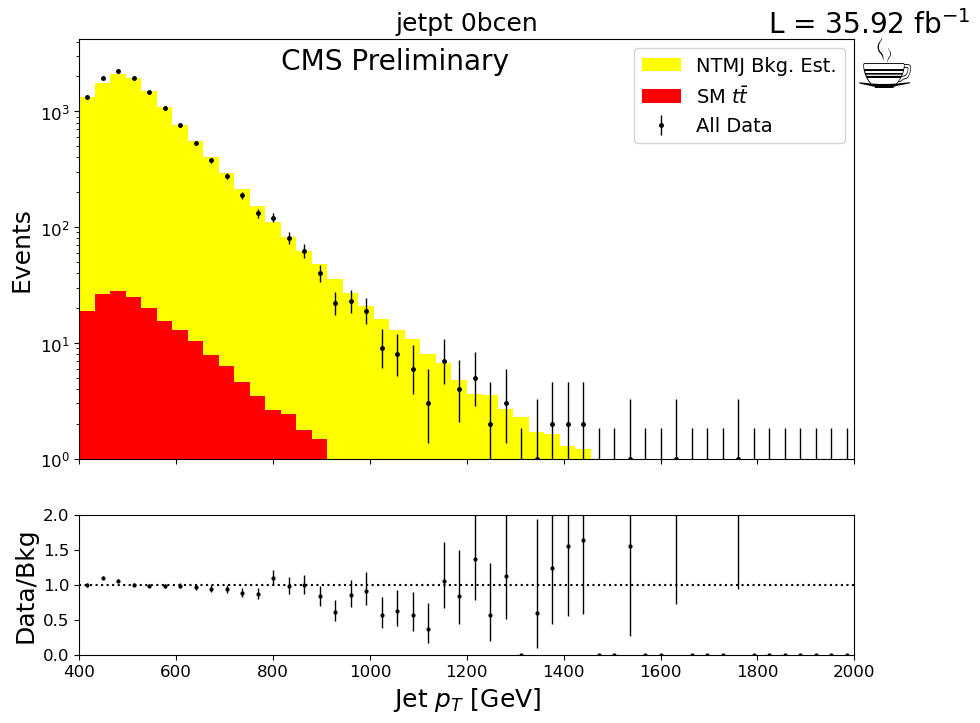

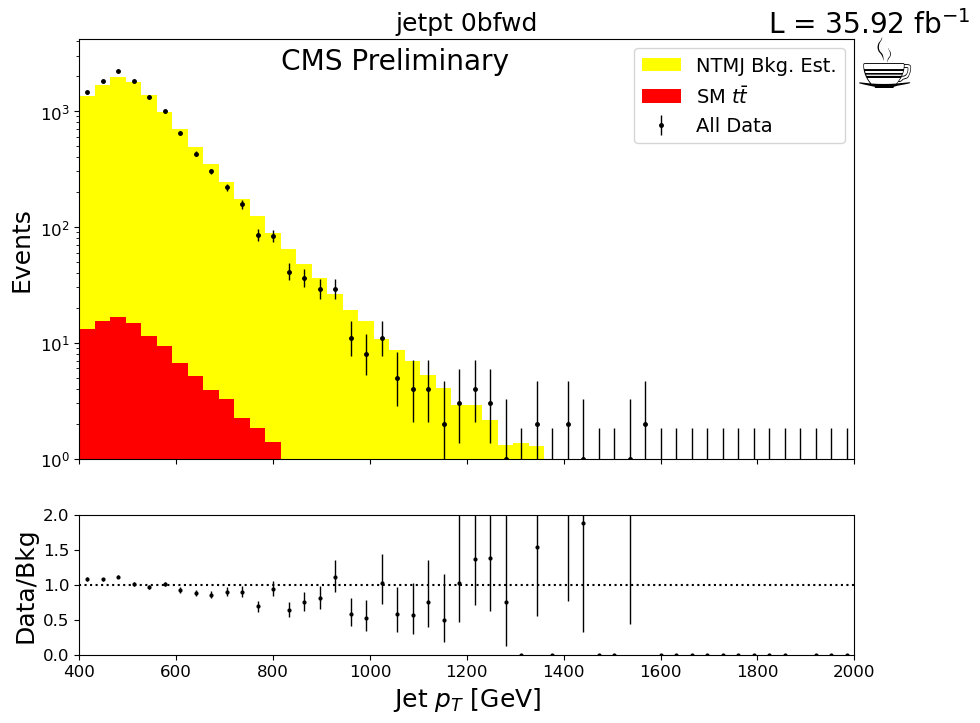

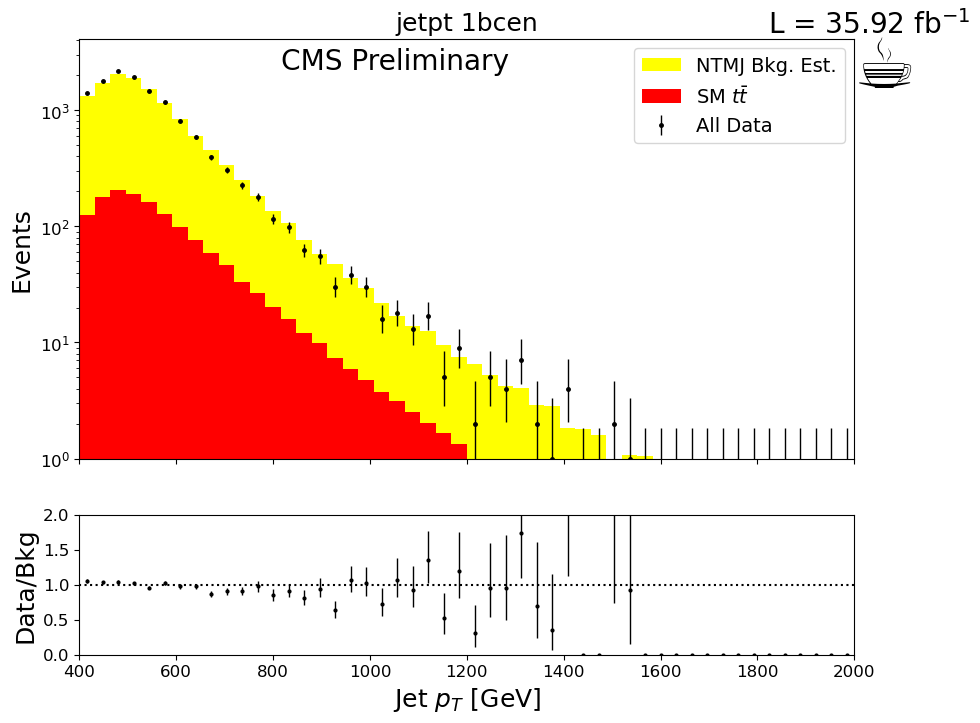

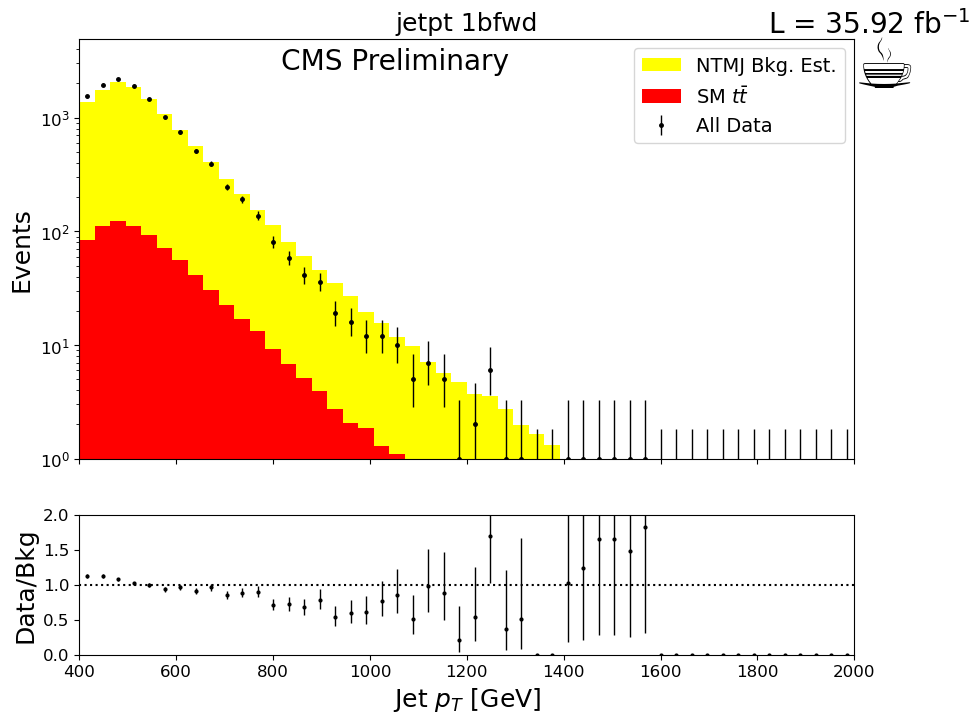

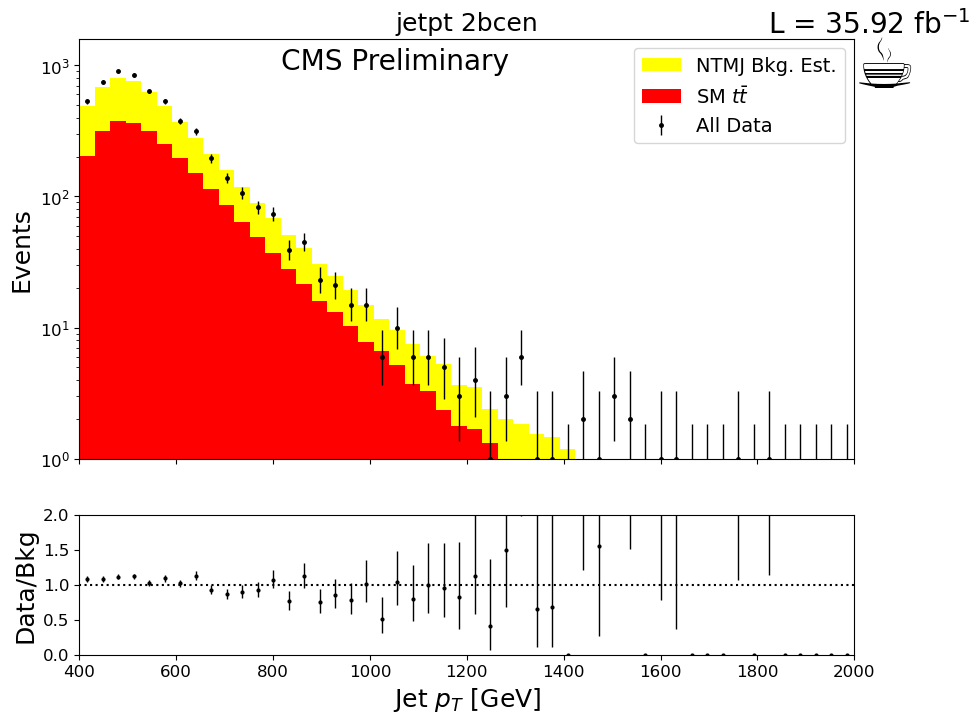

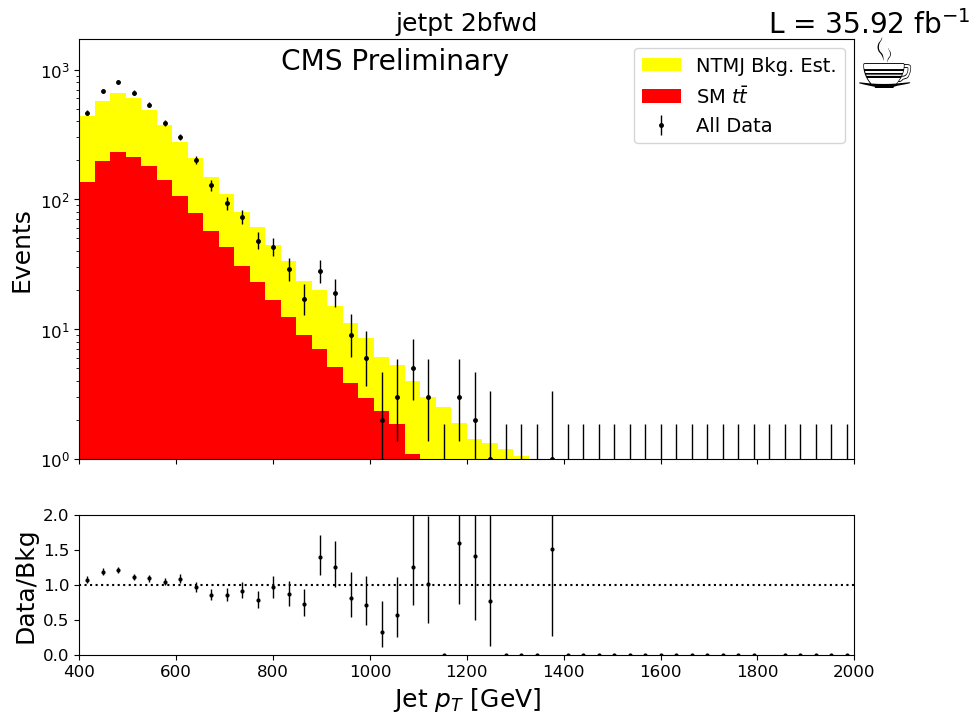

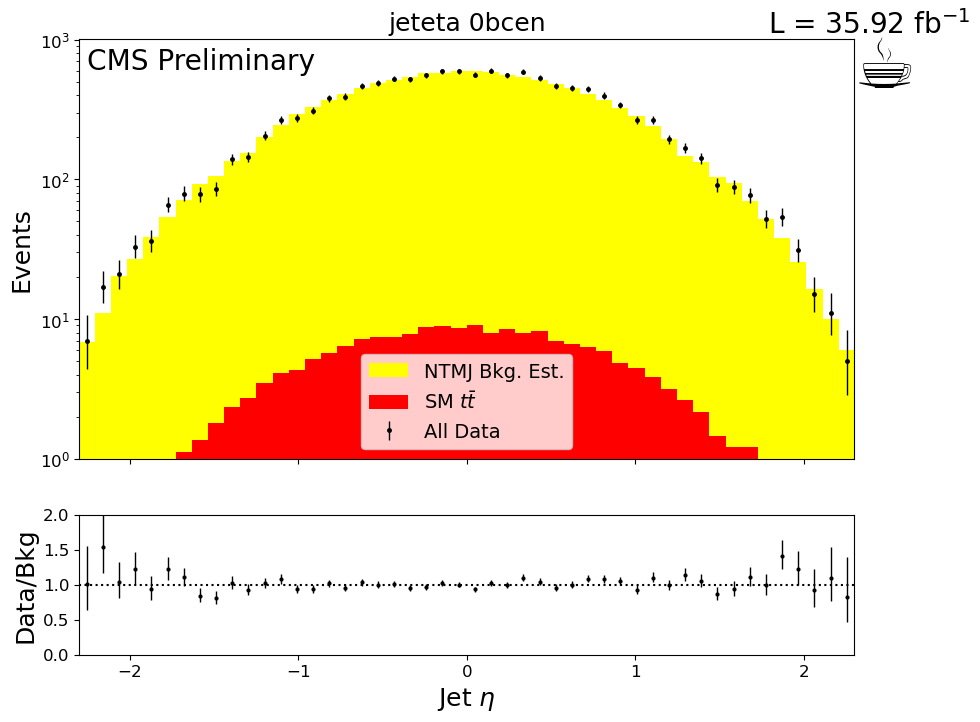

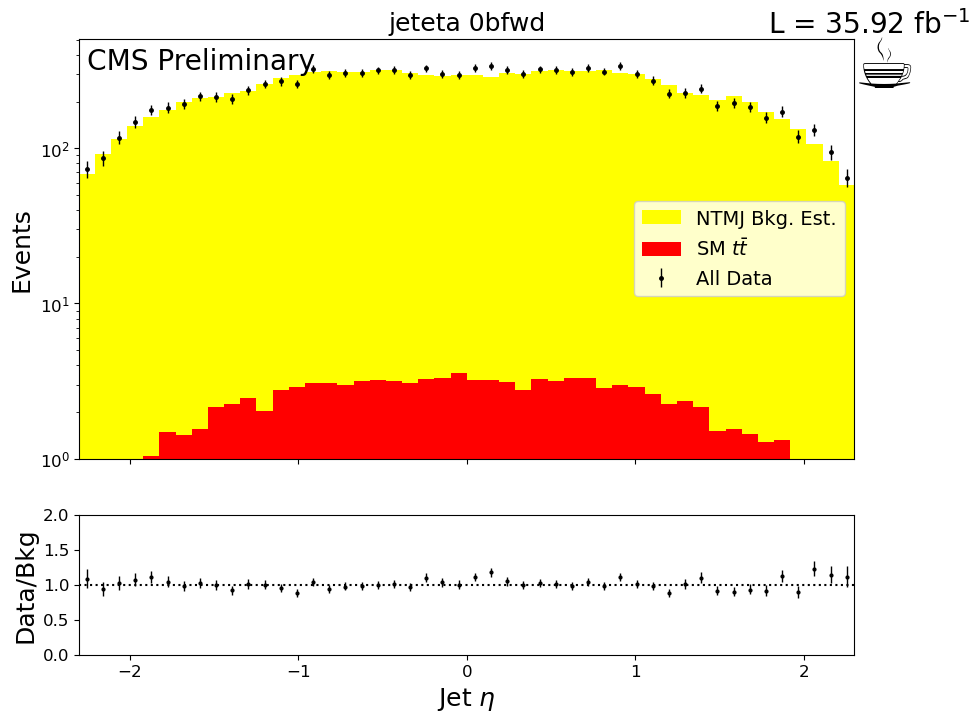

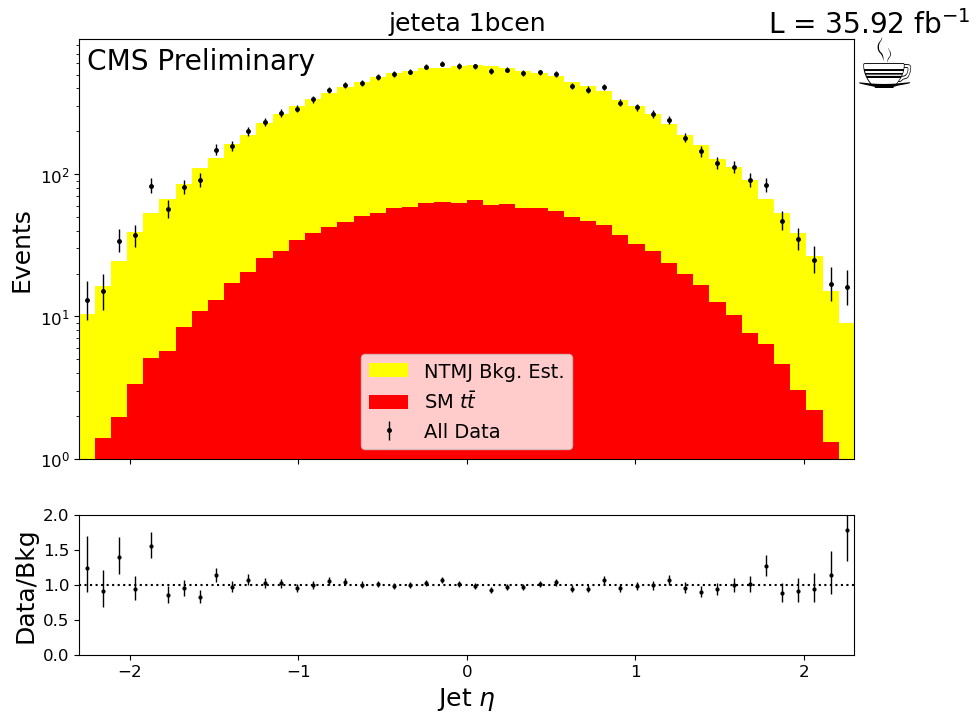

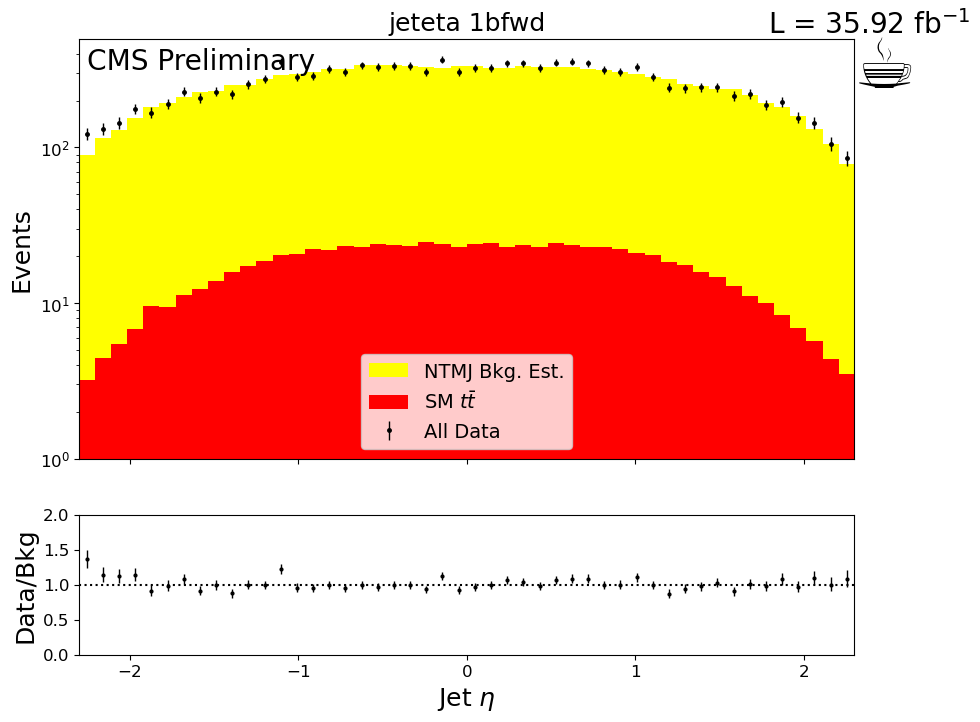

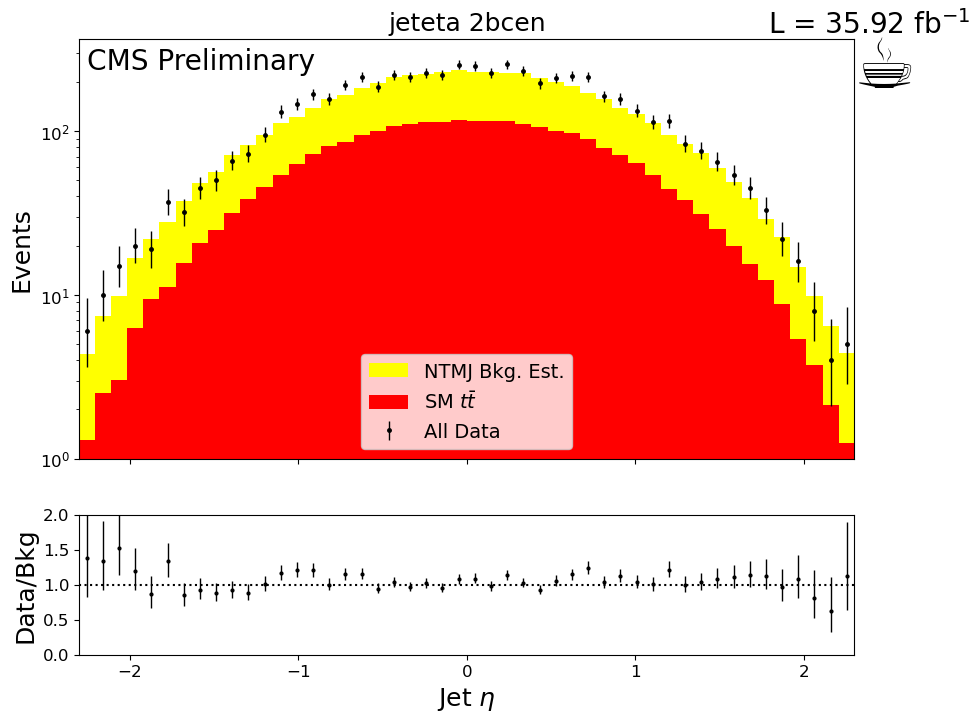

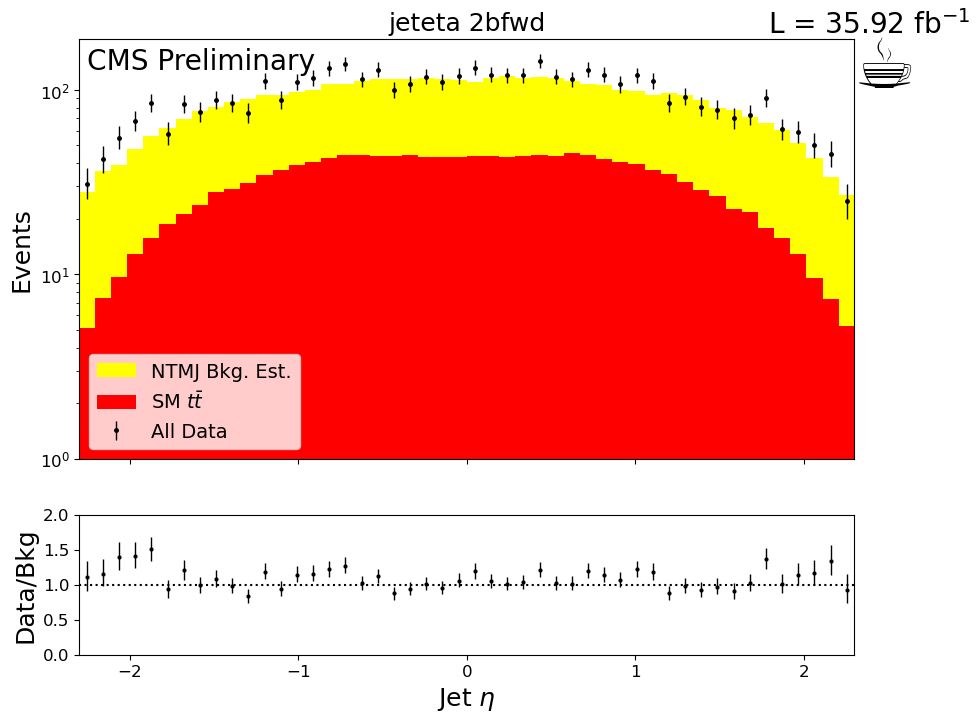

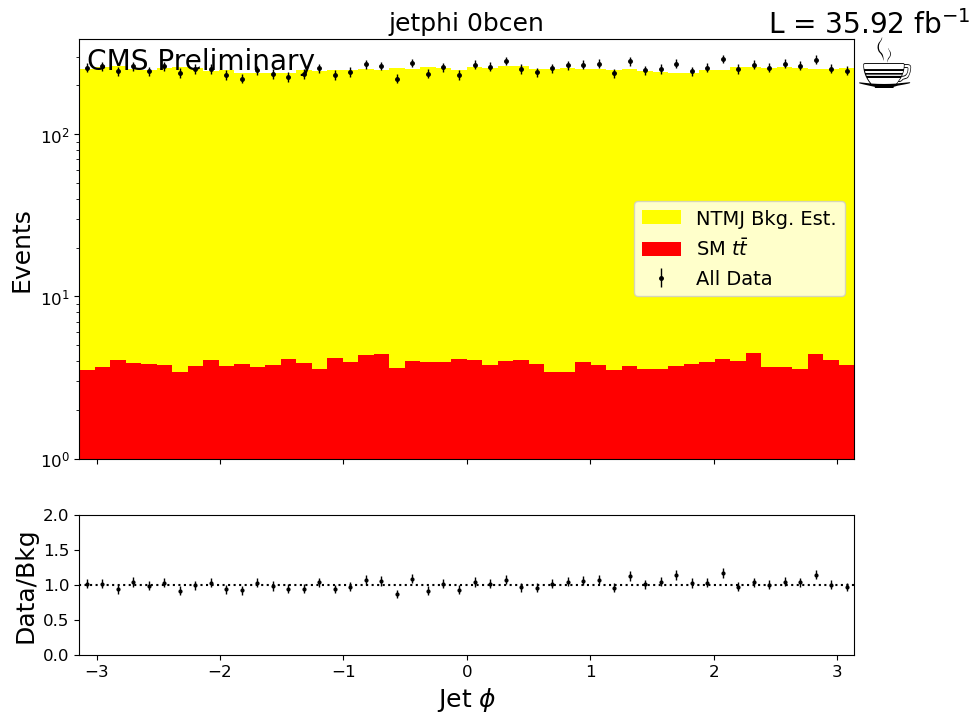

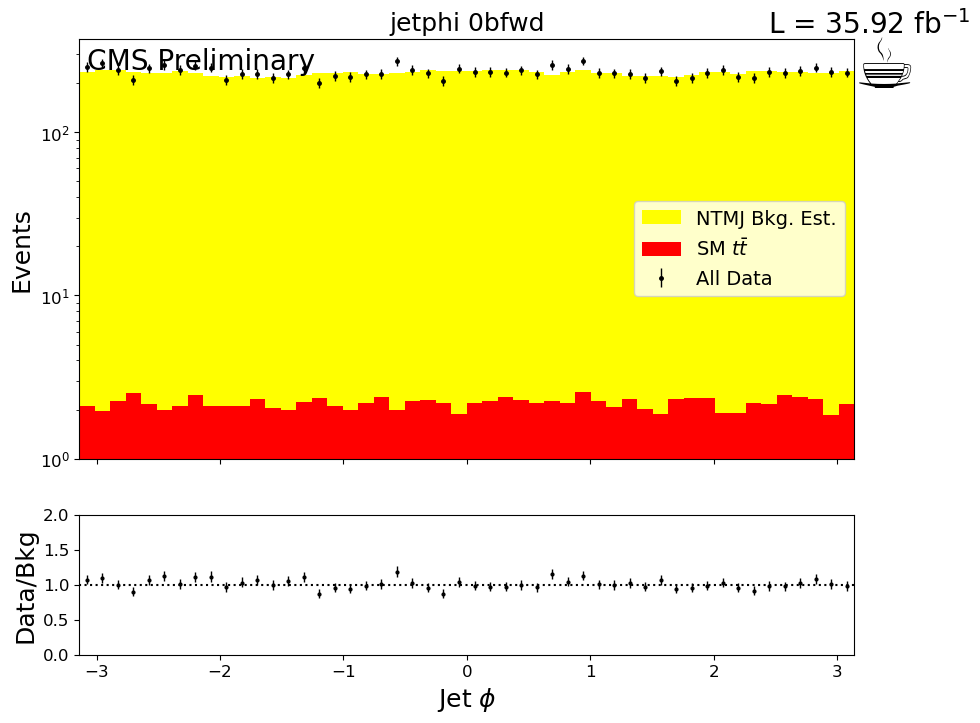

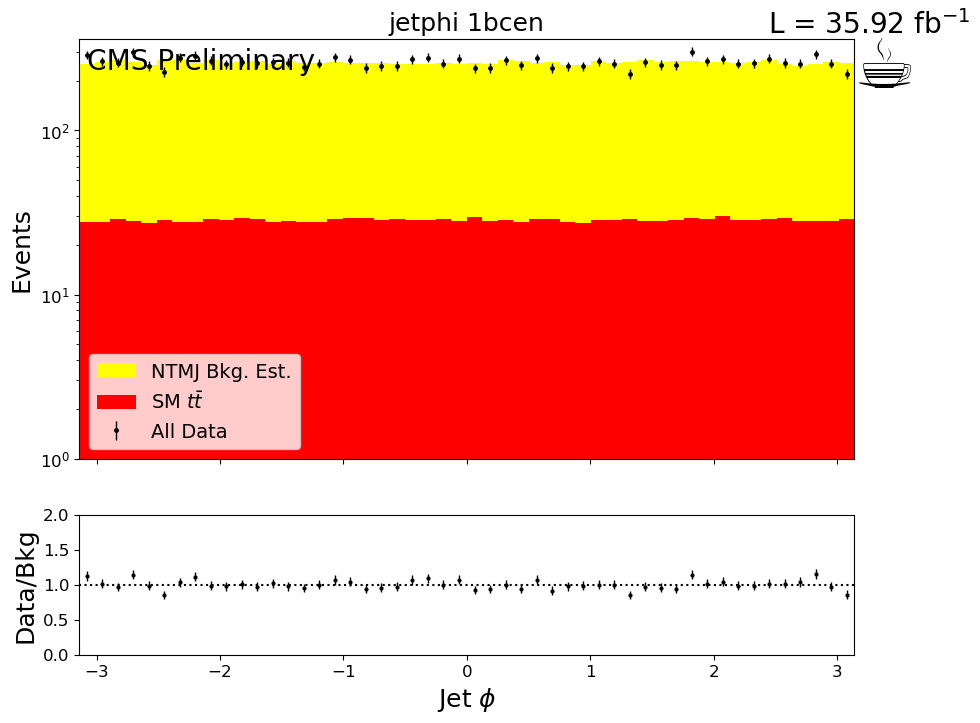

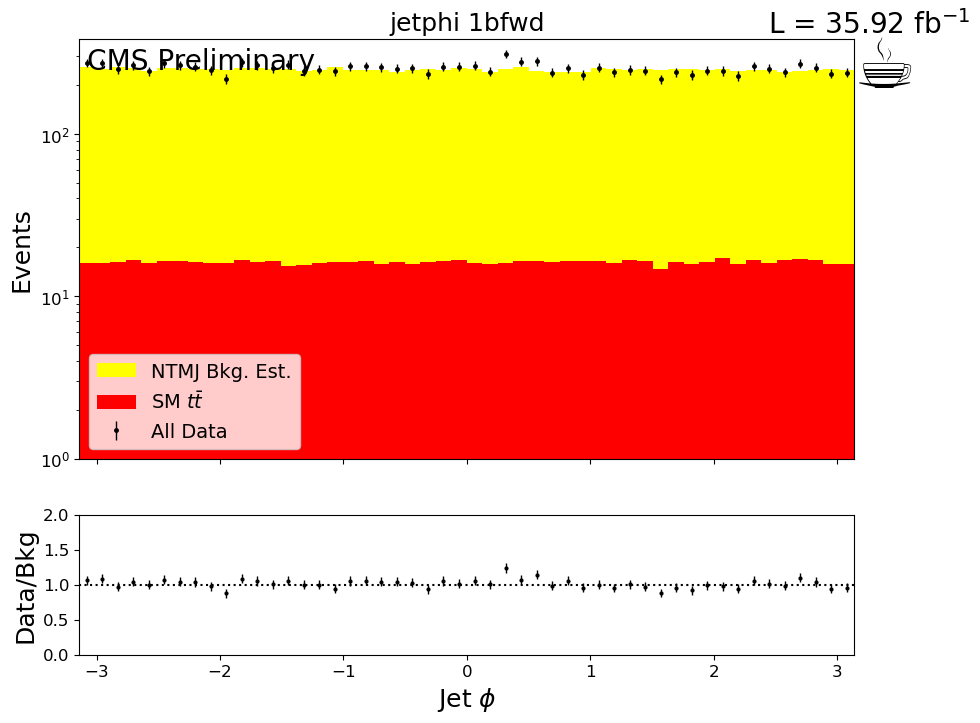

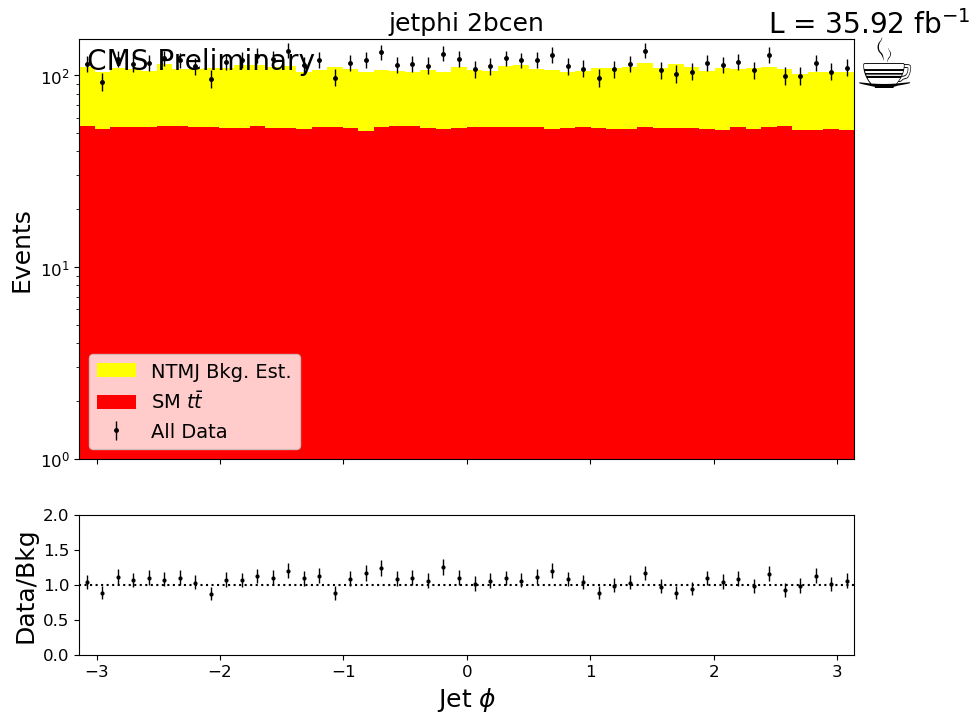

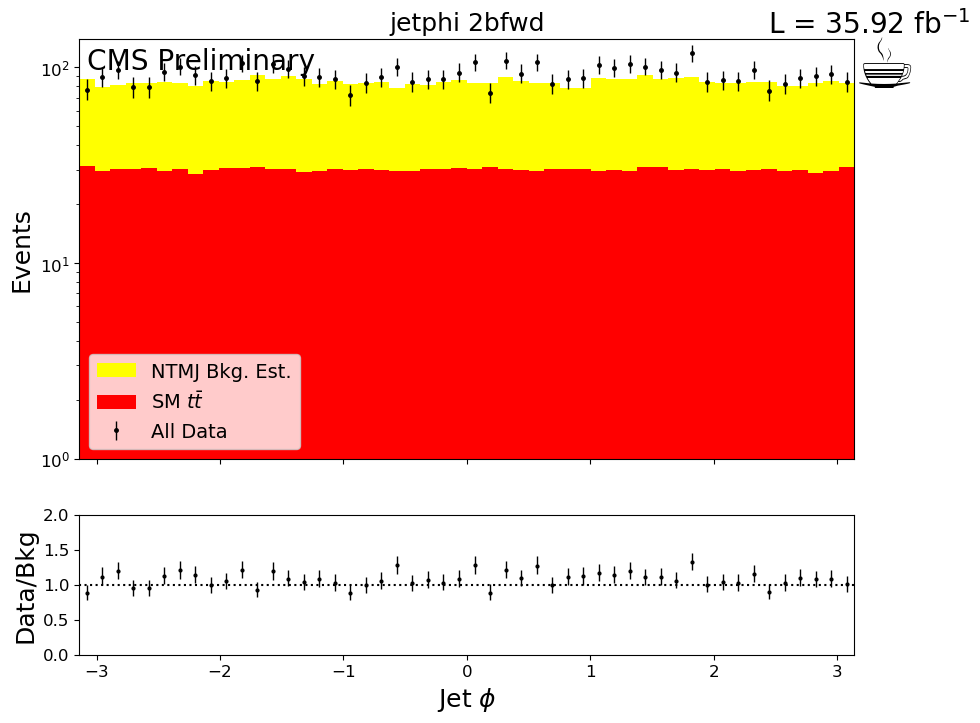

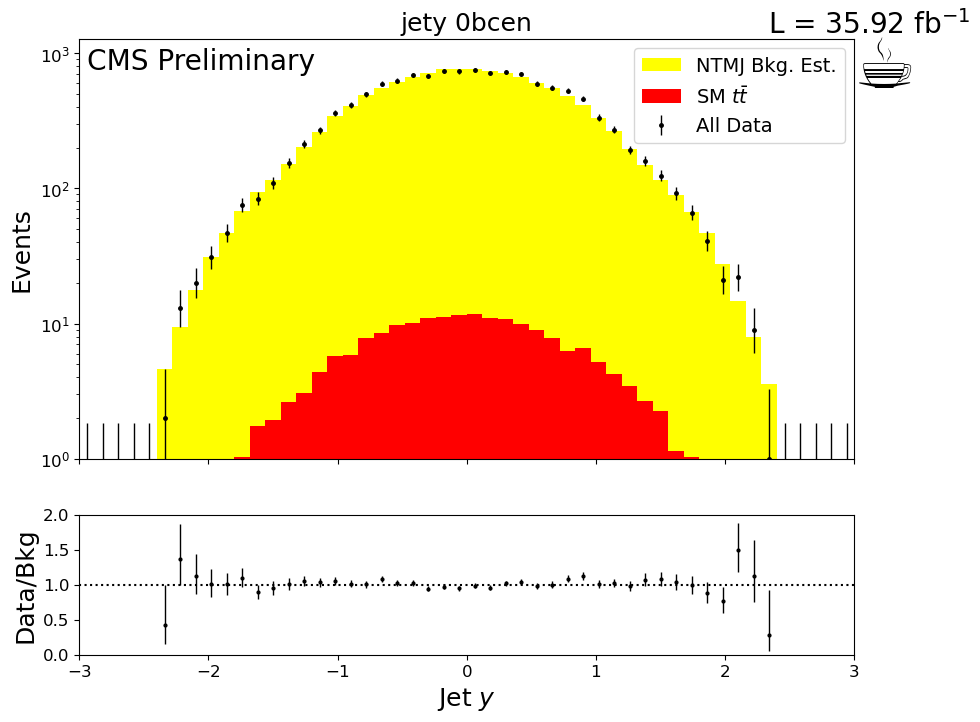

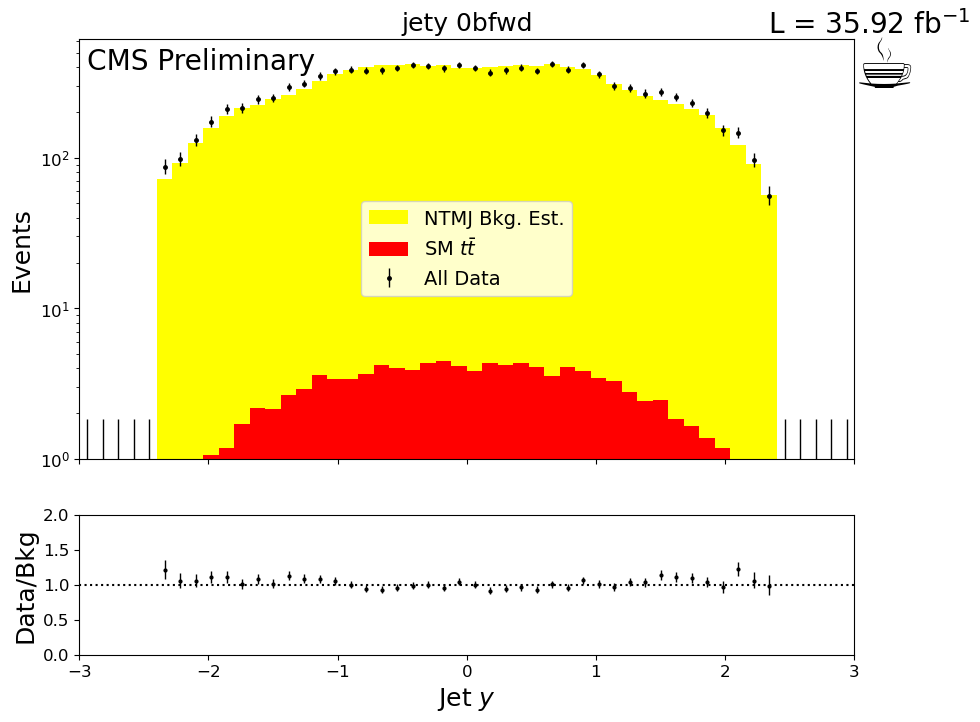

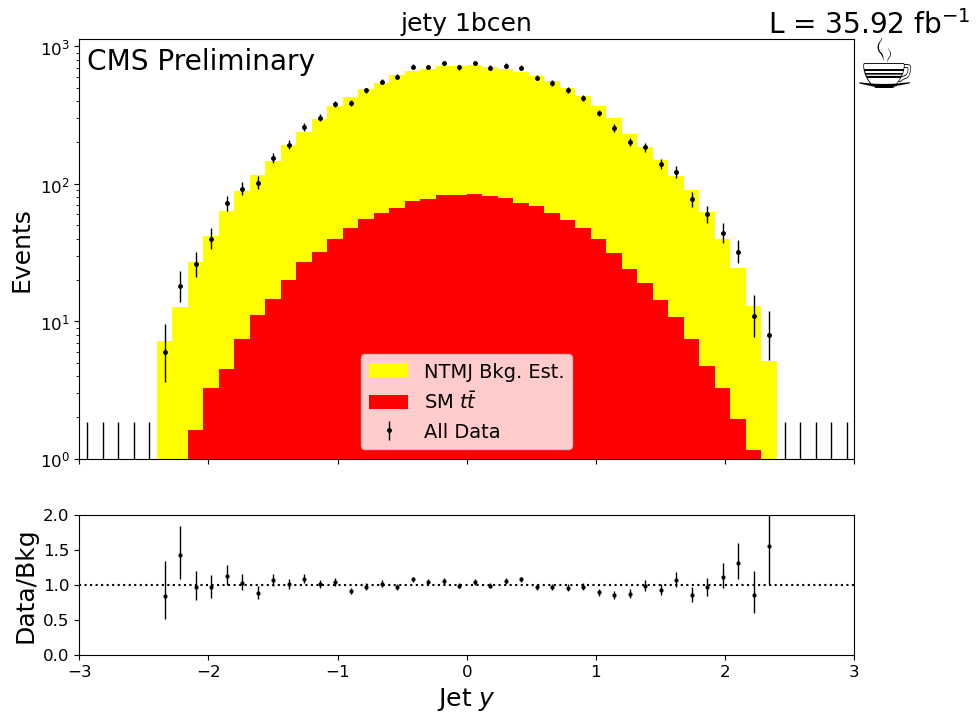

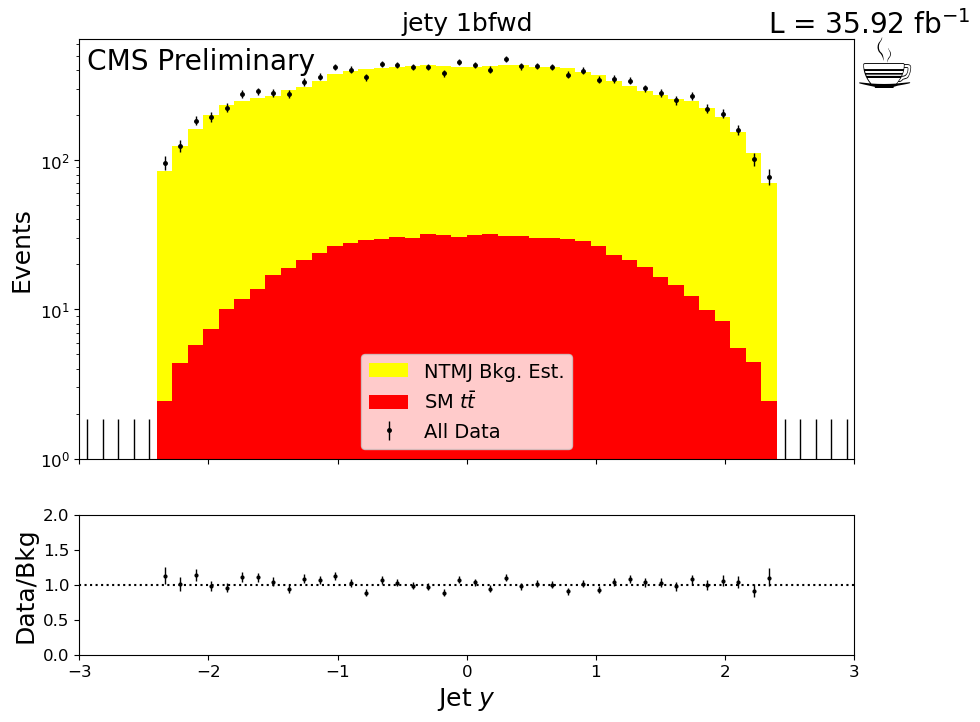

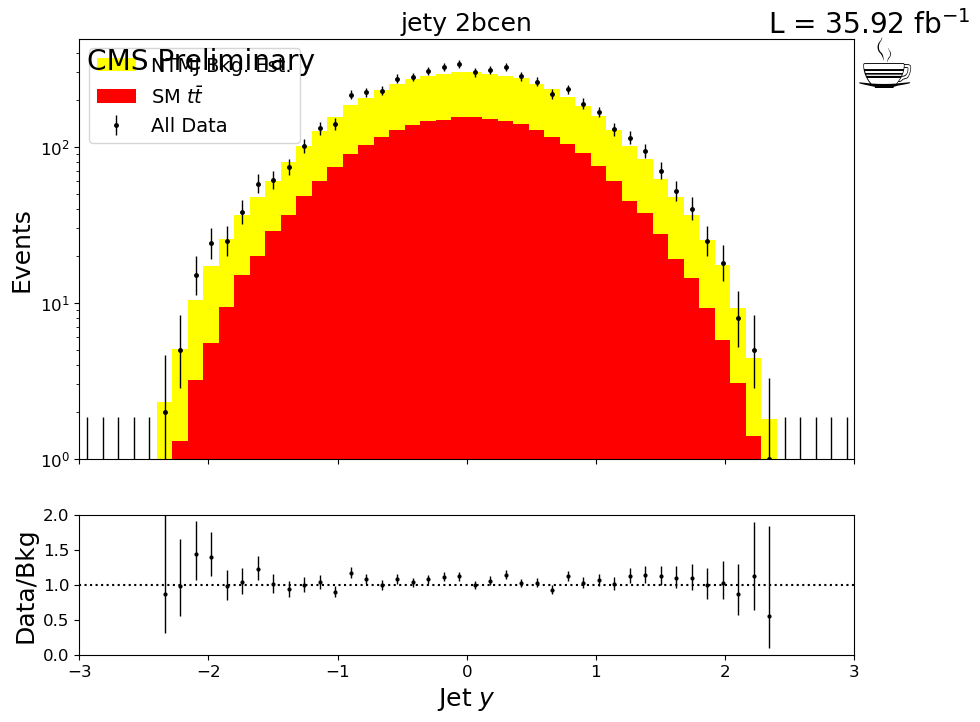

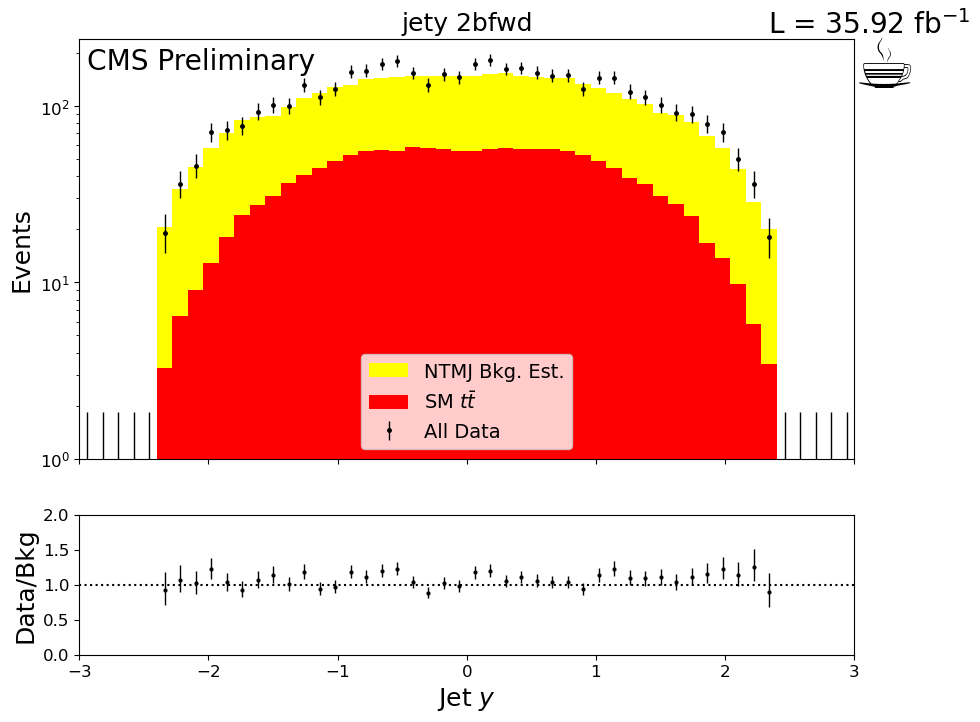

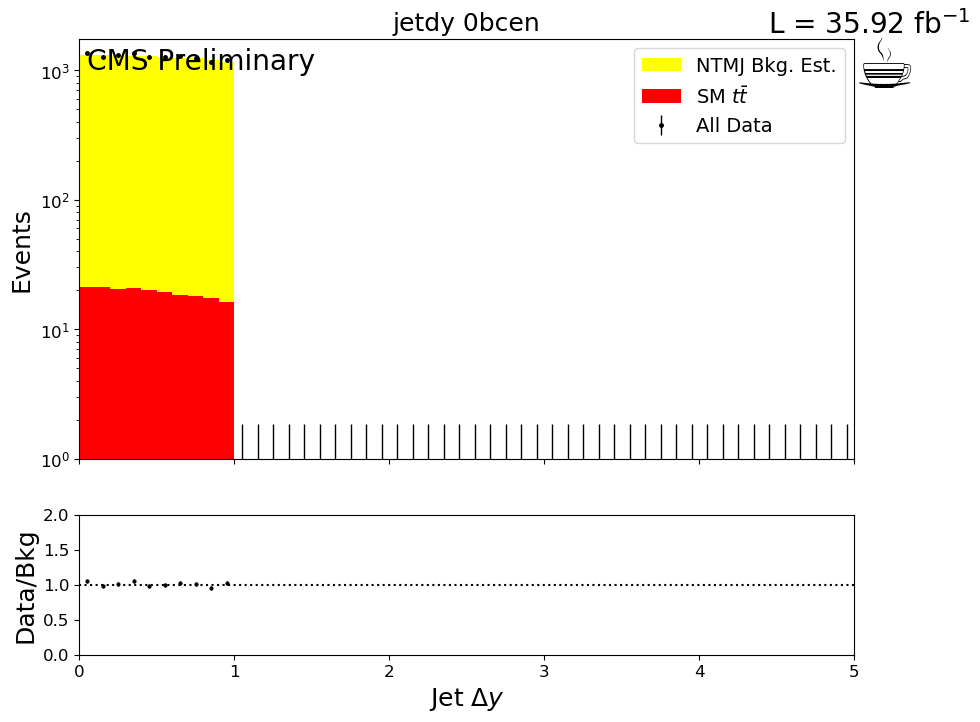

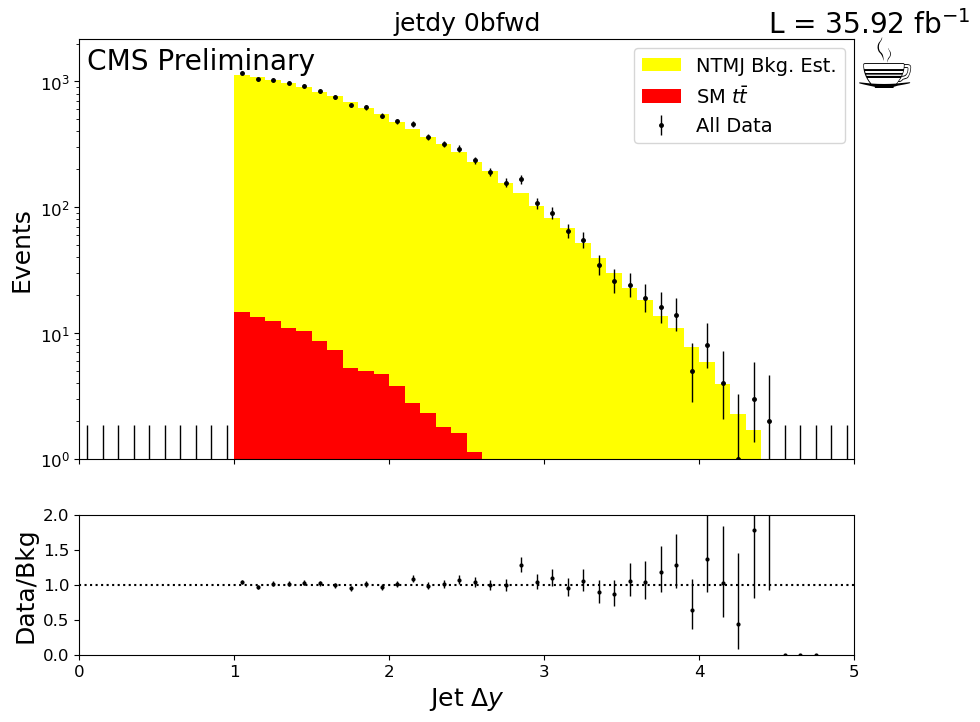

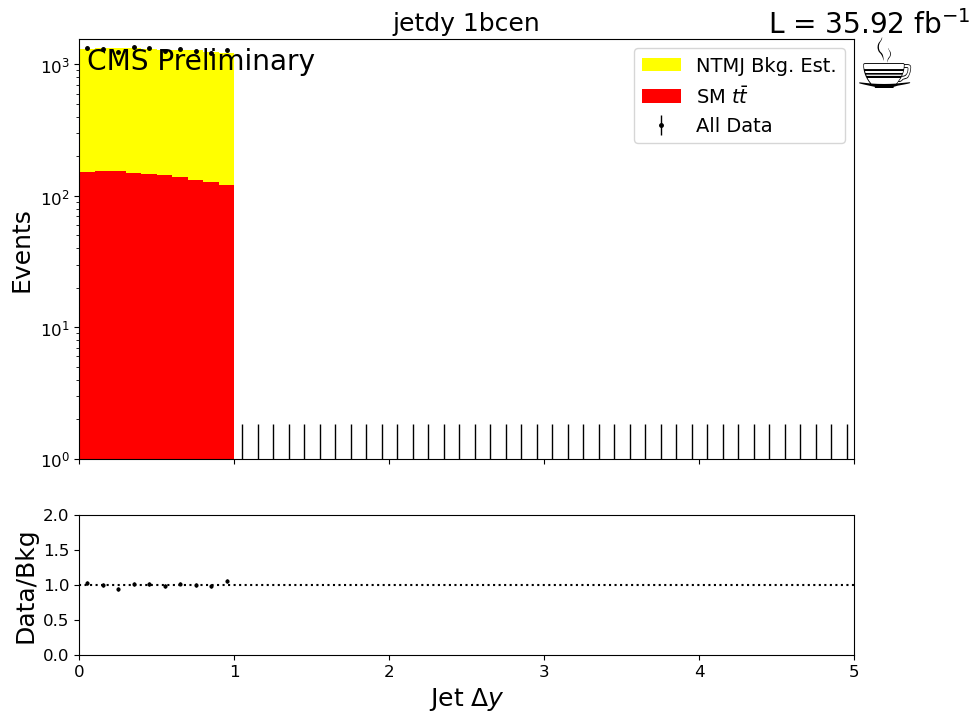

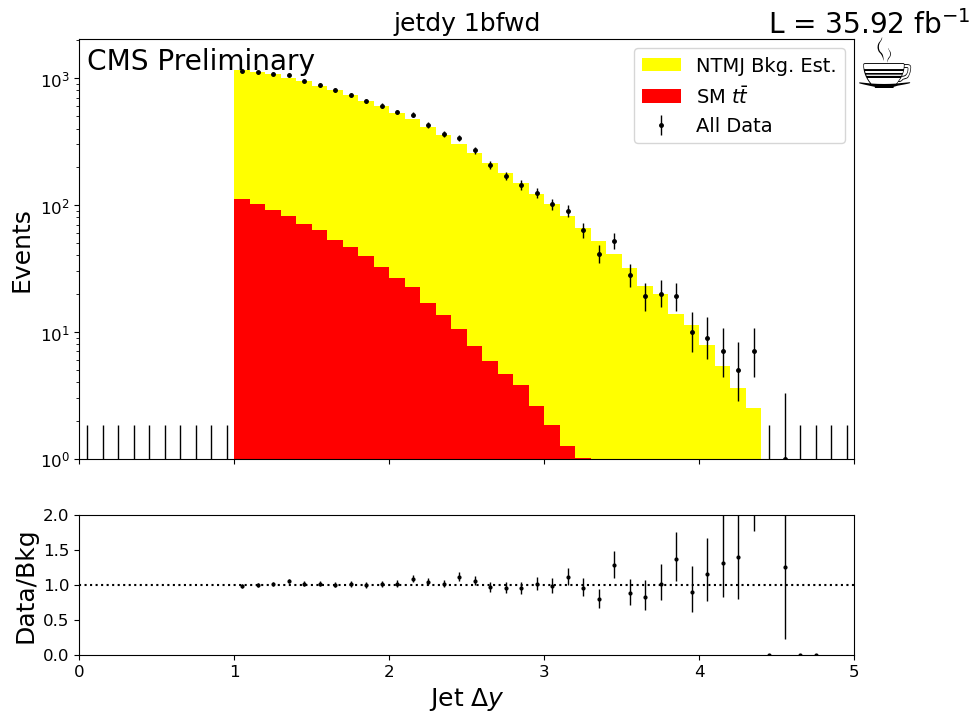

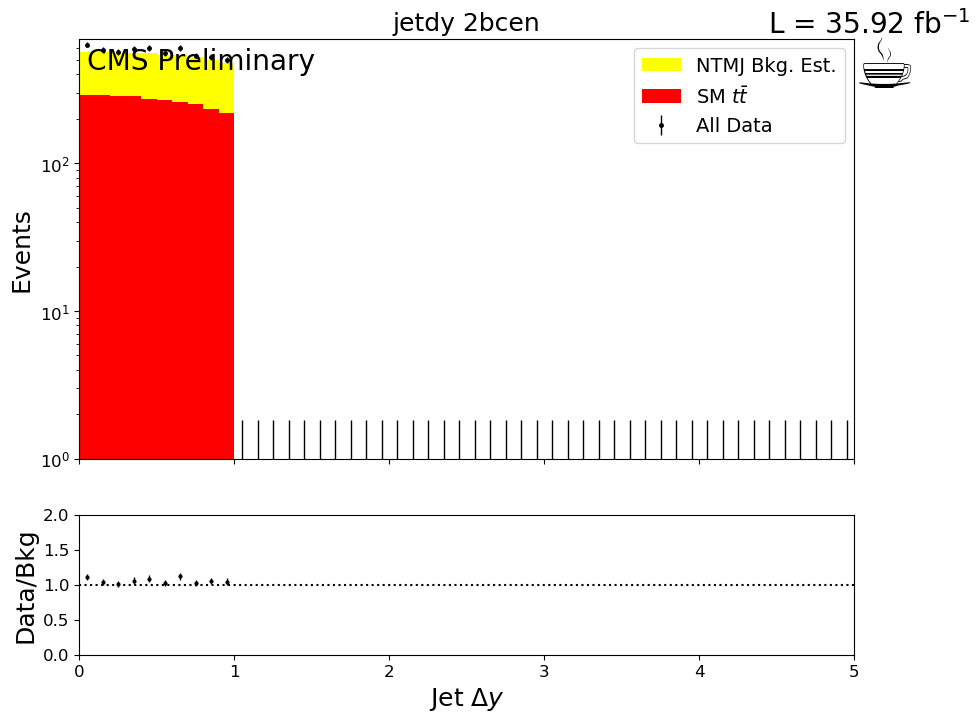

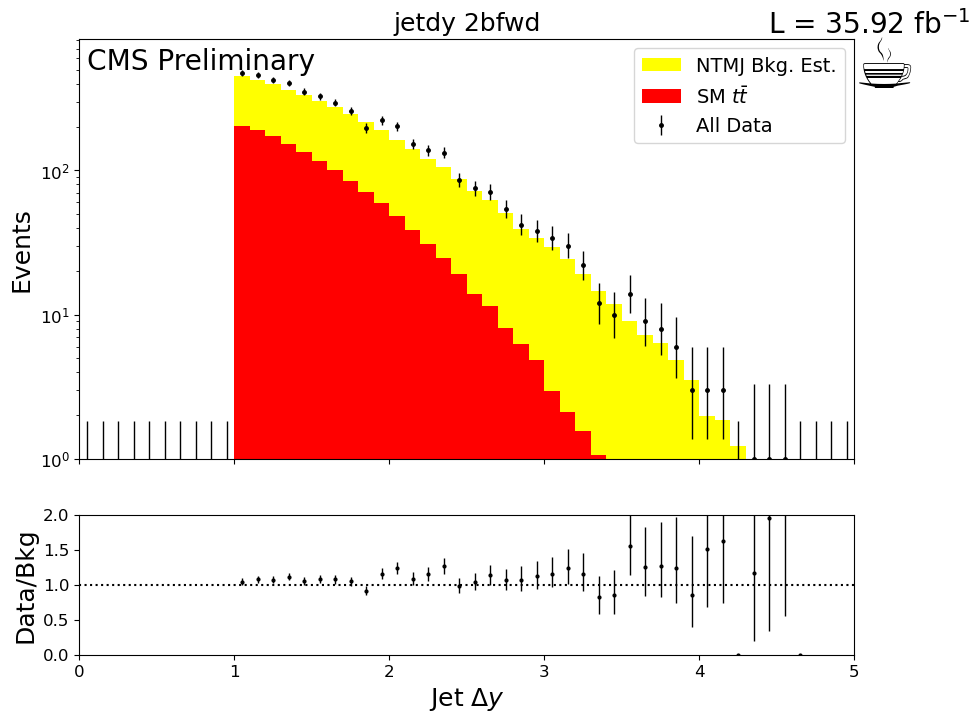

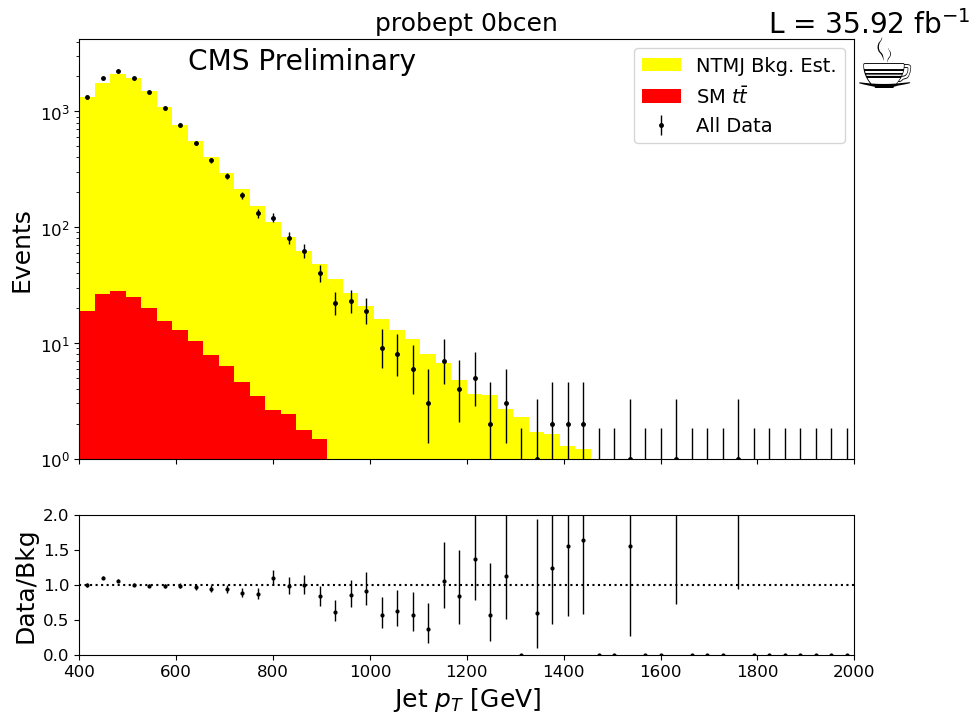

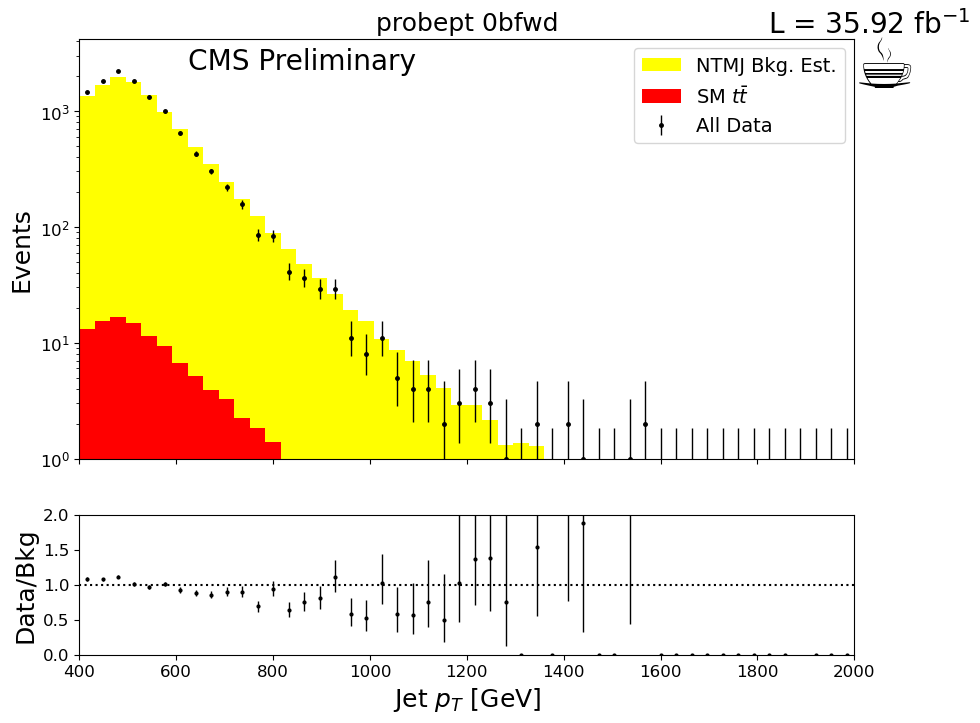

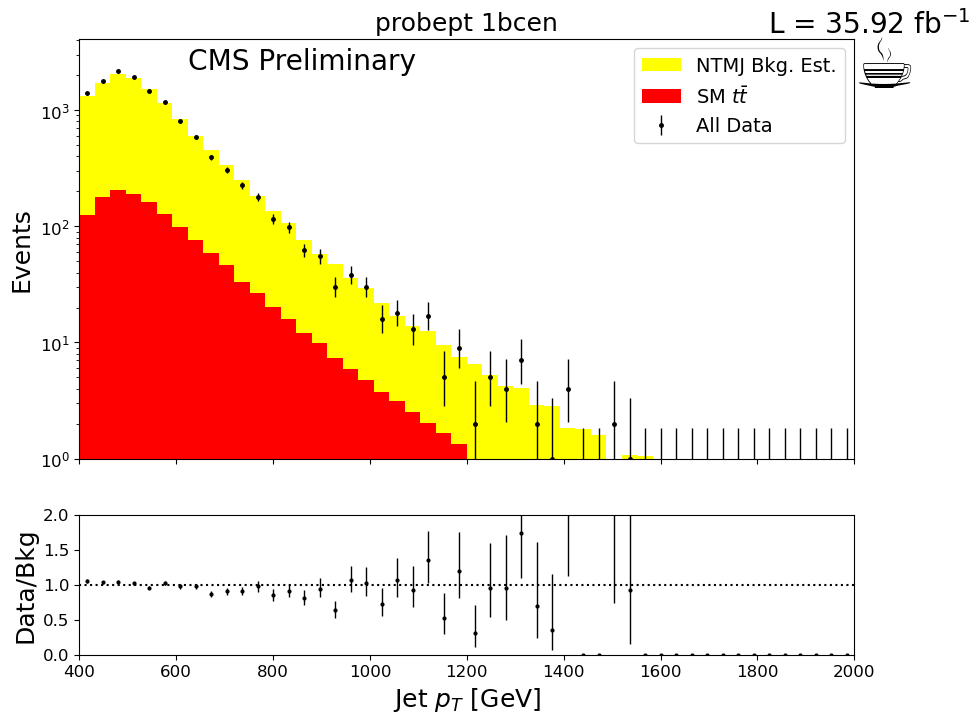

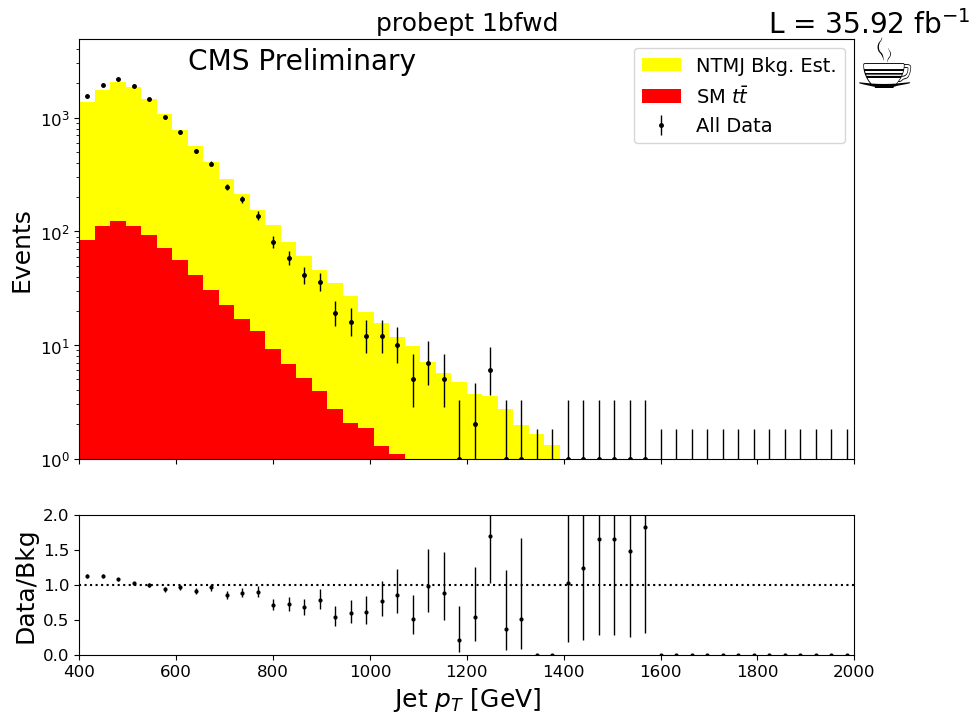

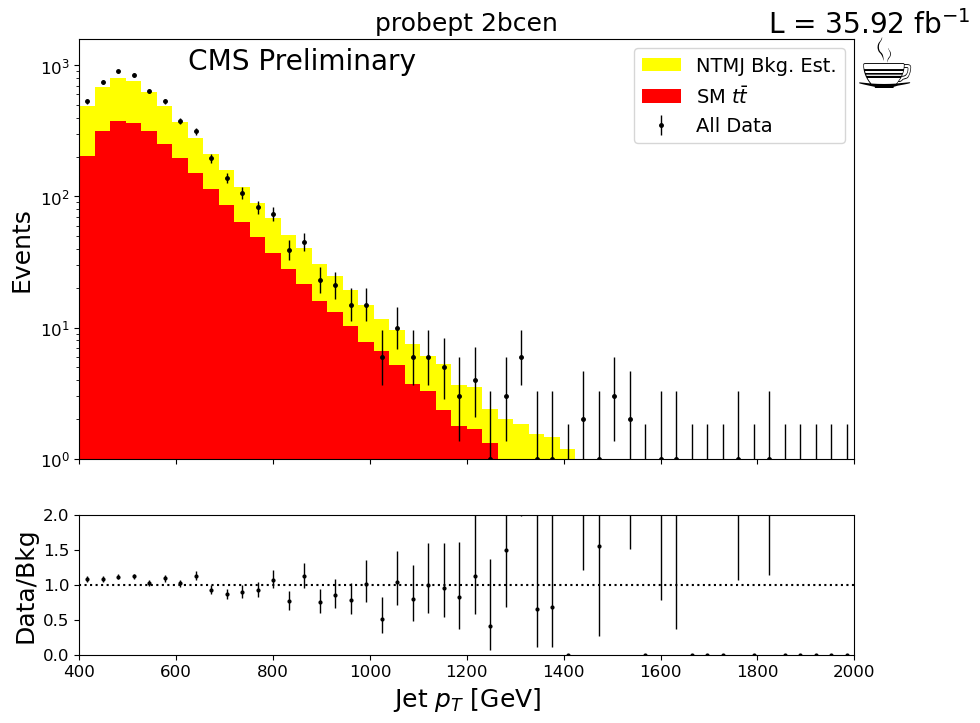

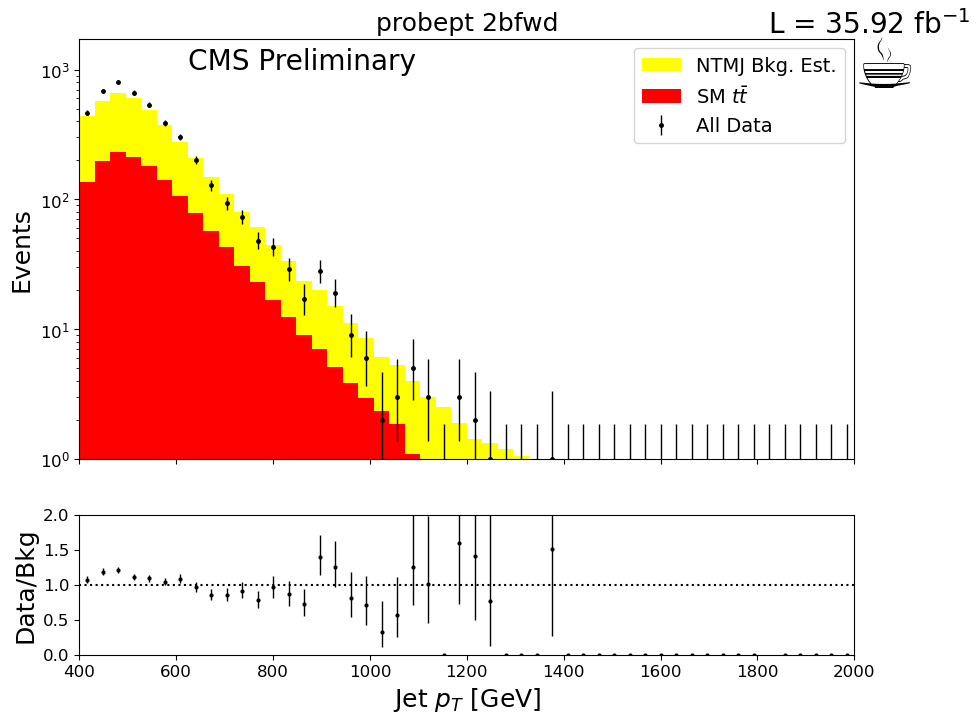

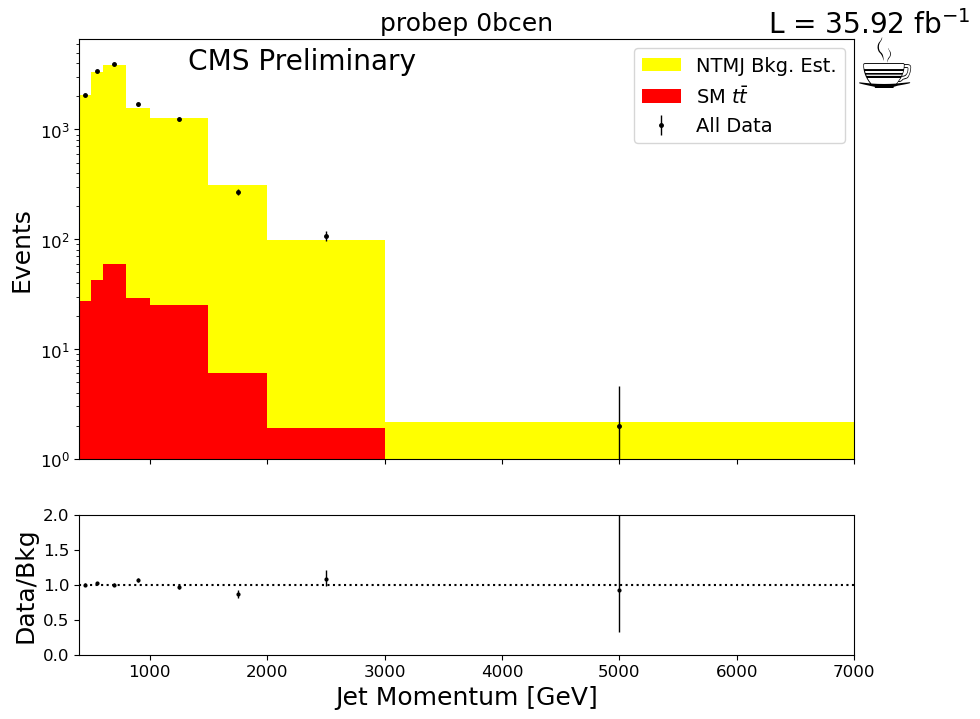

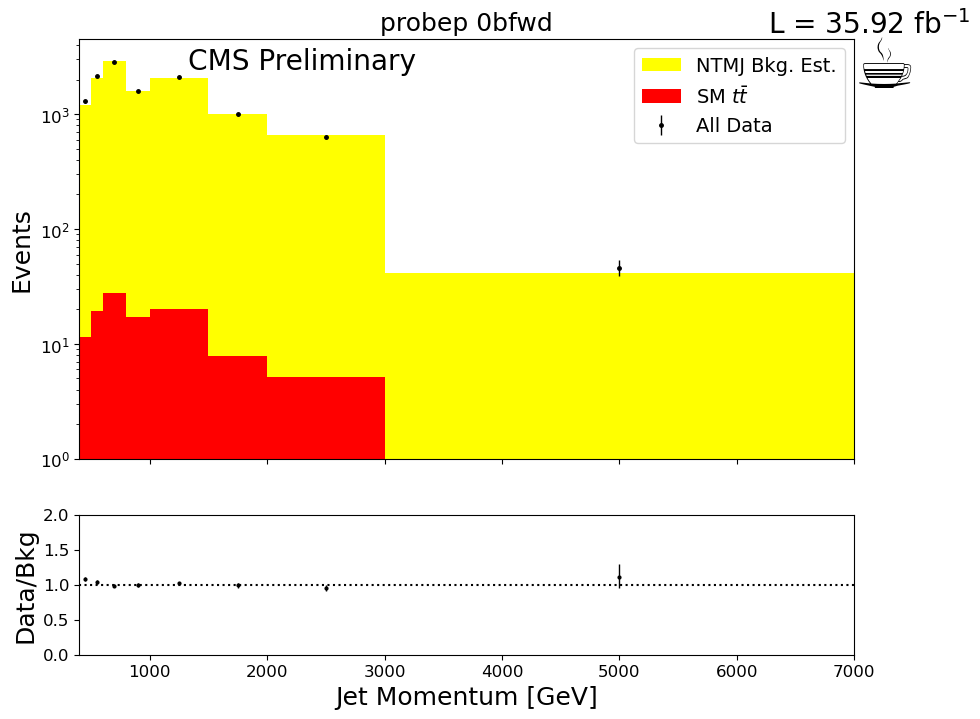

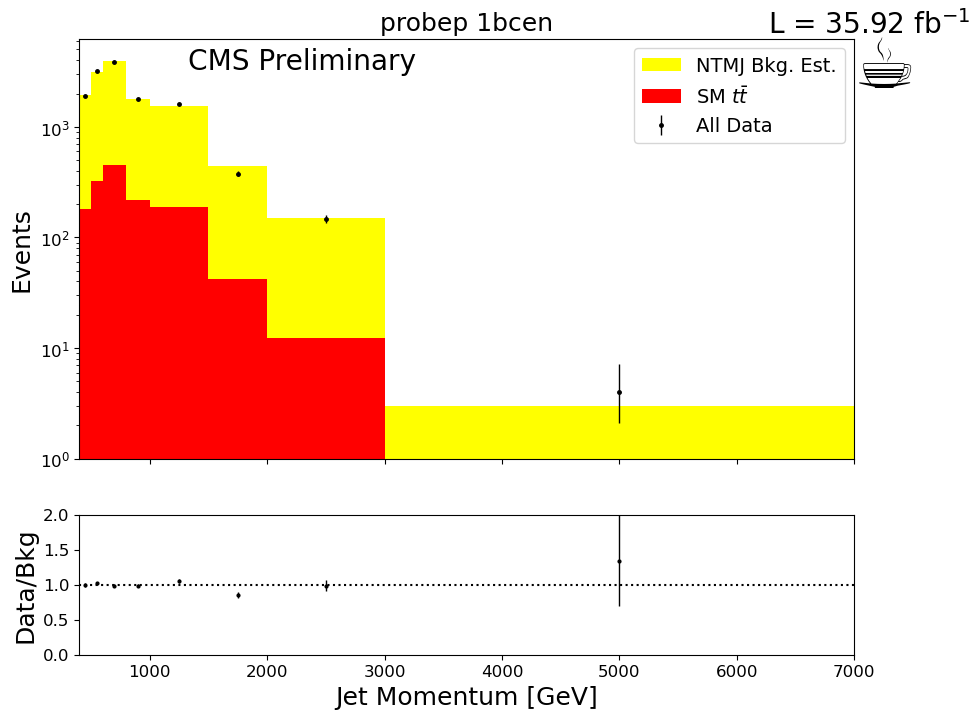

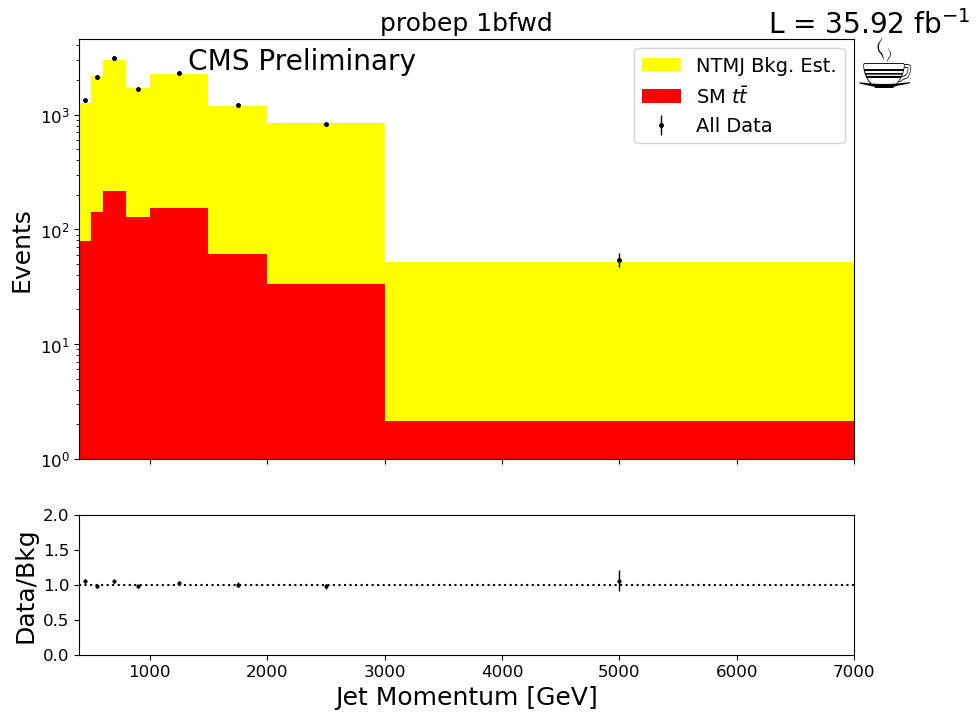

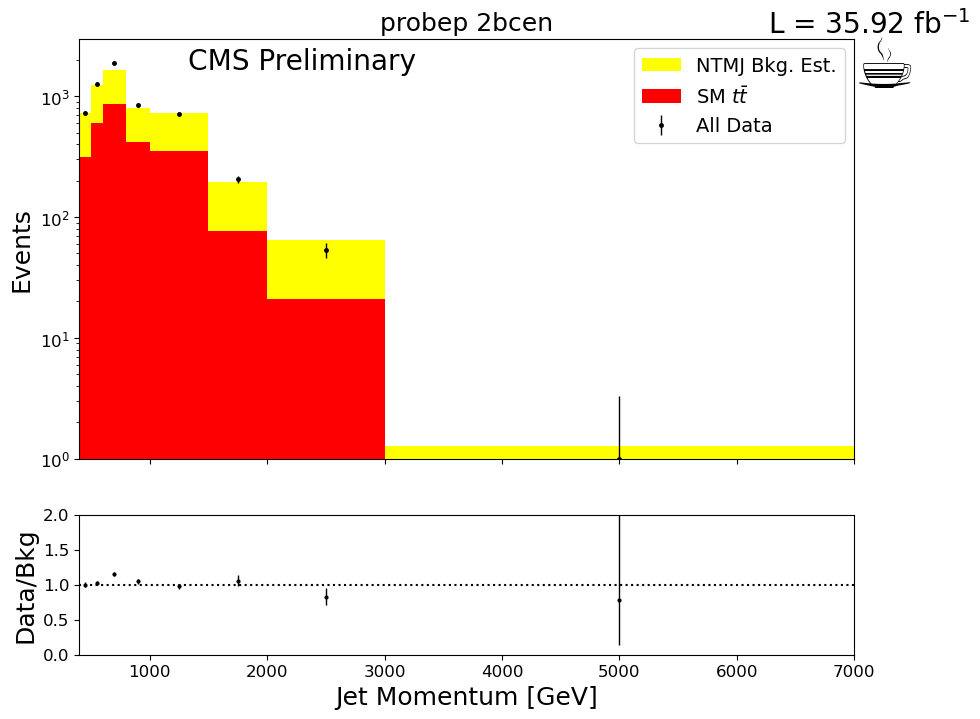

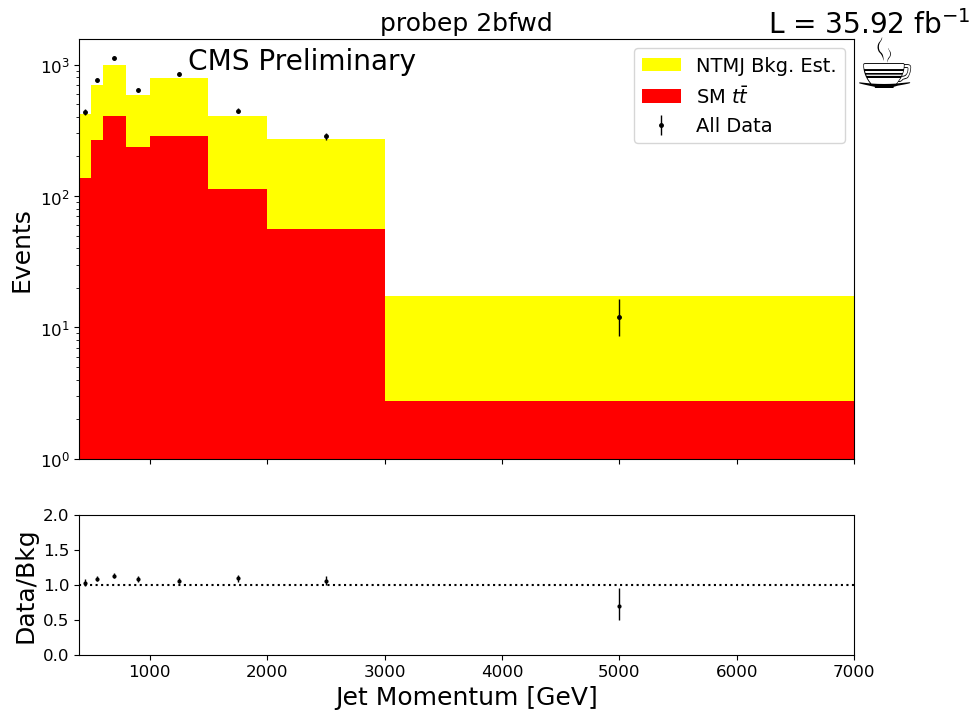

In [15]:
""" ---------- Comparing Background Estimate to Unweighted Data (One Histogram) ---------- """
""" --------------- Background: t tagged probe jet from data weighted by mistag --------------- """
""" --------------- Data: Unweighted Data from the Signal Region (2t tag region) -------------- """
apvdir = ''#APVDir['preVFP']
count = 0
DataOutName = f'{maindirectory}/BkgEstimate/{yearDir}{btagDir}{oddir}{btagType}{apvdir}SignalRegionOutput.txt'
filler = 'w'
PlotType = 'log'

list_of_hists = ['ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety', 'jetdy', 'probept', 'probep']
# list_of_hists = ['ttbarmass']

for name in list_of_hists:
    SaveDirectory = f'{maindirectory}/BkgEstimate/{yearDir}{btagDir}{oddir}{btagType}{apvdir}{name}/{PlotType}/' # split histograms into subdirectories
    hpd.DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already
    for b_y in list_of_bcats:
        plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
        })

        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(10,8),
            gridspec_kw={"height_ratios": (3, 1)},
            sharex=True,
        )
        # ---- initialize data histograms with first era ---- #
        JetHT2016_unwgt_str = 'UL16preVFP_JetHTB_Data'
        Data_hist_unwgt = JetHT2016_unweighted['B_preVFP'][name][JetHT2016_unwgt_str, hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        Data_hist_modmass_wgt = JetHT2016_weighted['B_preVFP'][name][JetHT2016_unwgt_str, hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]
        
        # ---- Add all data together ---- #
        for vfp in ['preVFP', 'postVFP']:
            #---- Define Histograms from Coffea Outputs ----# 
            if vfp == 'preVFP':
                for Era in ['C', 'D', 'E', 'F']: #exclude B because histogram is initialized with B era
                    JetHT2016_unwgt_str = f'UL16{vfp}_JetHT{Era}_Data'
                    # -- For Observed Signal -- #
                    Data_hist_unwgt += JetHT2016_unweighted[Era+'_'+vfp][name][JetHT2016_unwgt_str, hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
                    # -- For Mass Modified Background Estimate (Non-Top Multi-Jets; NTMJ)-- #
                    Data_hist_modmass_wgt += JetHT2016_weighted[Era+'_'+vfp][name][JetHT2016_unwgt_str, hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]
            else:
                for Era in ['F', 'G', 'H']: #exclude B because histogram is initialized with B era
                    JetHT2016_unwgt_str = f'UL16{vfp}_JetHT{Era}_Data'
                    # -- For Observed Signal -- #
                    Data_hist_unwgt += JetHT2016_unweighted[Era+'_'+vfp][name][JetHT2016_unwgt_str, hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
                    # -- For Mass Modified Background Estimate (Non-Top Multi-Jets; NTMJ)-- #
                    Data_hist_modmass_wgt += JetHT2016_weighted[Era+'_'+vfp][name][JetHT2016_unwgt_str, hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]

        

        # -- SM TTbar MC in Signal Region (Contributes to the Background) -- #
        SMTTbar1 = TTbar_unweighted1['preVFP'][name]['UL16preVFP_TTbar_700_1000', hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]\
                *ttbar2016_sf1['preVFP']\
                + TTbar_unweighted1['postVFP'][name]['UL16postVFP_TTbar_700_1000', hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]\
                *ttbar2016_sf1['postVFP']
        SMTTbar2 = TTbar_unweighted2['preVFP'][name]['UL16preVFP_TTbar_1000_Inf', hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]\
                *ttbar2016_sf2['preVFP']\
                + TTbar_unweighted2['postVFP'][name]['UL16postVFP_TTbar_1000_Inf', hpd.ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]\
                *ttbar2016_sf2['postVFP']
        SMTTbar = SMTTbar1 + SMTTbar2

        # -- Mistag Weighted TTbar MC (To Remove Double Counting of Untracked t-tagged J1 Events in Bkg.Est) -- #
        ExtraTTbar1 = TTbar_weighted1['preVFP'][name]['UL16preVFP_TTbar_700_1000', hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]\
                   *ttbar2016_sf1['preVFP']\
                   + TTbar_weighted1['postVFP'][name]['UL16postVFP_TTbar_700_1000', hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]\
                   *ttbar2016_sf1['postVFP']
        ExtraTTbar2 = TTbar_weighted2['preVFP'][name]['UL16preVFP_TTbar_1000_Inf', hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]\
                   *ttbar2016_sf2['preVFP']\
                   + TTbar_weighted2['postVFP'][name]['UL16postVFP_TTbar_1000_Inf', hpd.ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]\
                   *ttbar2016_sf2['postVFP']
        ExtraTTbar = ExtraTTbar1 + ExtraTTbar2
        

        # =============================================================================================================================== #
        
        # ---- TTbar MC Scaling ---- #
        # SMTTbar *= (ttbar2016_sf) # Prepare to include this with background estimate
        # ExtraTTbar *= (-ttbar2016_sf) # Prepare to subtract this from background to correct for ttbar contamination
        
        # ---- Add SM ttbar MC to background and remove excess events ---- #
        Data_hist_modmass_wgt += (SMTTbar) # Include signal region SM ttbar contribution to NTMJ for the complete background estimate
        #(mistagged ttbar events need to be removed)#
        Data_hist_modmass_wgt += (ExtraTTbar) # ttbar contamination subtraction from background estimate 
        #(removes doubly counted ttbar events included in previous line)#
        

        # =============================================================================================================================== #

        # ---- Background and Observed Signal for Histograms Compared with MC Signals ---- #

        # -- J0 t-tagged and weighted, J1 Mass Modified, SM ttbar included, J1 t-tagged double counts removed -- #
        Background_ModMass_Corrected = Data_hist_modmass_wgt 

        # -- Simple Observed Data in Signal Region -- #
        Observed = Data_hist_unwgt 
        
        # # ---- Shrink current axis by 10% ---- 3
        # box = ax.get_position()
        # ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])

        # ---- Plot Histograms (Comment out whatever you don't want included in the figure and/or root file) ---- #
        ObservedPlot = Observed.plot1d(ax=ax, histtype='errorbar', marker='.', markersize=5., color='k')
        BackgroundPlot = Background_ModMass_Corrected.plot1d(ax=ax, histtype='fill', color='yellow')
        TTbarPlot = SMTTbar.plot1d(ax=ax, histtype='fill', color='r')
        
        NtotalObserved = np.sum(Observed.view().value)
        NtotalBackground = np.sum(Background_ModMass_Corrected.view().value)
        NtotalTTbar = np.sum(SMTTbar.view().value)
        
        
        
        if count > 0:
            filler = 'a'
        if count < 6: # Print number of events for each category once
            with open(DataOutName, filler) as f:
                print(f'\t\t{b_y}\n===================================================', file=f)
                print('TTbar     =', '%10i'% NtotalTTbar,      file=f)
                print('Bkg. Est. =', '%10i'% NtotalBackground, file=f)
                print('Observed  =', '%10i'% NtotalObserved,   file=f)
                print('\n', file=f)
                count += 1
                
        ax.set_yscale(PlotType)
        ax.set_ylim(bottom=1.)
#         ax.autoscale('y')
#         ax.autoscale('x')#, tight=True) # doesn't look like its working...
        ax.set_ylabel('Events')
        ax.set_xlabel(None)
        ax.set_title(name + ' ' + b_y)

        #---- Plot Ratio ----#
        hpd.plotratio(Observed, Background_ModMass_Corrected, ax = rax, histtype='errorbar', marker='.', markersize=4., color='k')
        
        l1 = [r'NTMJ Bkg. Est.', r'SM $t\bar{t}$', r'All Data']
        legtitle1 = ax.legend(labels=l1, fontsize='medium')
        
        
        rax.set_ylabel('Data/Bkg')
        rax.axhline(y=1, color='k', linestyle=':')
        rax.set_ylim(0,2)
        
        CMSx, CMSy = 0.01, 0.98 # Position of CMS Preliminary label
        if 'ttbarmass' in name:
            rax.set_xlim(950,6000)
            CMSx = 0.14 
            CMSy = 0.98
        elif 'jetpt' in name:
            rax.set_xlim(400,2000)
            CMSx = 0.26 
            CMSy = 0.98
        elif 'jeteta' in name:
            rax.set_xlim(-2.3,2.3)
        elif 'jetphi' in name:
            rax.set_xlim(-3.14, 3.14)
        elif 'jety' in name:
            rax.set_xlim(-3., 3.)
        elif 'jetdy' in name:
            rax.set_xlim(0., 5.)
        elif 'probept' in name:
            rax.set_xlim(400., 2000.)
            CMSx = 0.14 
            CMSy = 0.98
        elif 'probep' in name:
            rax.set_xlim(400., 7000.)  
            CMSx = 0.14 
            CMSy = 0.98
        

        #---- Labeling ----#
        Lint = str(Lum2016*.001) # Integrated Luminosity
        lumi = plt.text(1.15, 1.07, "L = " + Lint[:6] + " fb$^{-1}$",
                fontsize='x-large',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )
        CMS = plt.text(CMSx, CMSy, 'CMS Preliminary',
                fontsize='x-large',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes
               )
        coffea = plt.text(1.00, 0.85, u"☕",
                  fontsize=50,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )

        filename = 'BkgEst_' + name + '' + Unc + '_' + b_y + '.png'
        # plt.savefig(SaveDirectory+filename, bbox_inches="tight")
        print('\n' + SaveDirectory + filename)
